# PISA of compensatory MIRT normalized version with normal theta and Q which evaluated individually (0607)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preprocessing

In [2]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [3]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [4]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [5]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [6]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
#print("Each student's Answer Rates: ", stud_AR)
#print("Answer Rates for each Items: ", prob_AR)

In [7]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [8]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_np = fil4.to_numpy()
print(num_np)

# 극과 극은 통하니까 함께 사라져!
scarub_np = np.where(num_np == 1, 0.99, num_np)
scourge_np = np.where(scarub_np == 0, 0.01, scarub_np)
num_df = scourge_np                                     # df가 전혀 아니지만, 일단 족보 꼬이니까 df라고 칩시다.
print(num_df)
num_dfdf = pd.DataFrame(num_df)
p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]
2727 51


## Selection of students for the test set

In [9]:
from collections import Counter
import random

In [10]:
def NaN_gen(df_pray, coord):                  # 여기서 df_pray는 num_df급의 원본 데이터를 넣어줘야 함
    
    df_result = df_pray.copy()
    test_set = {}
    
    for x_coord in coord.keys():
        y_coord = coord[x_coord]
        
        test_key = "x_coord = {0}, y_coord = {1}".format(x_coord, y_coord)         # test_set 딕셔너리에 기존값 담기
        test_value = df_result.loc[x_coord][y_coord]
        test_set[test_key] = test_value
        
        df_result.loc[x_coord][y_coord] = np.nan                                   # test_set 딕셔너리에 담은 값 NaN 처리 (흥남철수 후 흥남부두를 폭파시킨 장면과 유사)
        
    return df_result, test_set                 # df_result는 dataframe, test_set은 딕셔너리

In [11]:
# test set에 담을 students 선별: 본게임 시작!

basket_ini = pd.concat([num_dfdf, p_solves], axis=1)

num_dfdf_stunt = num_dfdf.copy()               # num_dfdf 대역으로 추가
num_dfdf_stunt.columns = fil4.columns.to_list()


In [12]:
train_gagongs = []
test_gagongs = []
num_iter = 1
num_unit = 0

for i in range(num_iter):
    # index number 먼저 업데이트
    num_unit += 1
    
    # 외부 데이터 input 받아내기 1st.
    basic_info_df = pd.read_csv("UIRT_extract_{0}_0521.csv".format(num_unit))
    basic_info_list = basic_info_df.values.tolist()
    
    # 주어진 데이터를 딕셔너리로 변환
    Gumeong_dict = {}

    for stud in basic_info_list:
        carrier_key = stud[1]
        carrier_value = stud[2]
        Gumeong_dict[carrier_key] = carrier_value

    #print(Gumeong_dict)

    num_df_gagong, test_set_gagong = NaN_gen(num_dfdf_stunt, Gumeong_dict)        # Train set(전자), Test set(후자) 각각 생성
    train_gagongs.append(num_df_gagong)
    test_gagongs.append(test_set_gagong)


In [13]:
print("Test_set is collected.")
print(test_gagongs[0])
print("The residue is Train_set itself.")
print(train_gagongs[0])
print(train_gagongs[0].loc[1117]['CM155Q01S'])

Test_set is collected.
{'x_coord = 356, y_coord = CM411Q02S': 0.01, 'x_coord = 714, y_coord = CM420Q01S': 0.01, 'x_coord = 511, y_coord = CM033Q01S': 0.99, 'x_coord = 780, y_coord = CM034Q01S': 0.99, 'x_coord = 1235, y_coord = CM033Q01S': 0.99, 'x_coord = 1543, y_coord = CM034Q01S': 0.99, 'x_coord = 1255, y_coord = CM411Q01S': 0.99, 'x_coord = 473, y_coord = CM411Q01S': 0.99, 'x_coord = 1367, y_coord = CM474Q01S': 0.99, 'x_coord = 131, y_coord = CM420Q01S': 0.01, 'x_coord = 151, y_coord = CM803Q01S': 0.01, 'x_coord = 498, y_coord = CM033Q01S': 0.99, 'x_coord = 450, y_coord = CM803Q01S': 0.99, 'x_coord = 2321, y_coord = CM411Q01S': 0.99, 'x_coord = 518, y_coord = CM474Q01S': 0.99, 'x_coord = 2446, y_coord = CM442Q02S': 0.99, 'x_coord = 1741, y_coord = CM033Q01S': 0.99, 'x_coord = 1439, y_coord = CM474Q01S': 0.99, 'x_coord = 927, y_coord = CM442Q02S': 0.99, 'x_coord = 815, y_coord = CM034Q01S': 0.99, 'x_coord = 1968, y_coord = CM155Q01S': 0.99, 'x_coord = 695, y_coord = CM155Q01S': 0.99,

In [14]:
test_winnowed = []

In [15]:
for gagong_unit in test_gagongs:
        
    # Threshing the dictionary
    thresh_ini = gagong_unit.copy()
    thresh_keys = thresh_ini.keys()
    thresh_values = thresh_ini.values()
    #print(thresh_keys)
    #print(thresh_values)
    
    # Polishing the raw data
    threshed_result = []

    for axis in thresh_ini.keys():
        carrier_null = []

        axis_split = axis.split(', ')
        carrier_xlist = axis_split[0]
        x_vector = carrier_xlist.split(' = ')
        xlist_coord = int(x_vector[1])

        carrier_ylist = axis_split[1]
        y_vector = carrier_ylist.split(' = ')

        carrier_null.append(xlist_coord)
        carrier_null.append(y_vector[1])
        carrier_null.append(thresh_ini[axis])

        threshed_result.append(carrier_null)
    test_winnowed.append(threshed_result)

In [16]:
print(test_winnowed[0][0][1])

CM411Q02S


## List of Functions What We Need

## Real NDG Process

In [17]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = fil4.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [18]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# 모든 변수 초기값의 형태는 np
def expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    gagong_let = train_gagong_let.to_numpy()
    exponet_1 = alpha_let * theta_let
    exponet_2 = alpha2le * theta2le
    
    before_nan = np.exp(exponet_1 + exponet_2 - d_let)/(1+np.exp(exponet_1 + exponet_2 - d_let))
    after_nan = before_nan.copy()
    
    # 순진한 모델값에 구멍 뚫어버리기
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(gagong_let[n][m]):
                after_nan[n][m] = np.nan
    
    # 너덜해진 모델값의 모난 부분 절단
    scarub = np.where(after_nan > 0.99, 0.99, after_nan)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    model_result = scourge
    
    return model_result                              # numpy 형태로 return


In [19]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
    
    gagong_let = train_gagong_let.to_numpy()
    p_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = gagong_let.copy()                                                    # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu           # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태 but 결측치를 제거하지는 않음

In [20]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = theta_let * common_unit                               # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [21]:
# 의문의 delta값 갱신하는 함수
# theta_let, delta_let, alpha_let은 np
def set_delta(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * common_unit                                                # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_dtak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    d_med = d_let - A * delta_dtak                                            # Gradient Descent 방식으로 D_KL의 delta 업데이트
    d_result = d_med - np.mean(d_med)
    
    # 결과값은 np 형태로 추출
    return d_result

In [22]:
def update_theta(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = alpha_let * common_unit                                           # summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_thetak = delta_matrix2.sum(axis=1, keepdims = True)   # summation 직후 (문제당 beta 맞추기 위한 summation)
        
    theta_update = theta_let - A * delta_thetak                 # Gradient Descent 방식으로 D_KL 업데이트
    
    # 결과값은 np 형태로 추출
    return theta_update

### $\theta_{2}$ Update

In [23]:
def Shell_gagong(samjin_data, Q_let):              # gagonged_data는 불변인 DataFrame, Q_let은 계속 변화
    # gagonged_data는 -1, 1 및 결측치 0처리 된 상태로 도입, numpy 형태로 도임
    
    num_gagong = samjin_data.copy()
    rows_let = num_gagong.shape[0]
    columns_let = num_gagong.shape[1]

    # 개인 covariance 도출(3D Tensor 형태)
    shell_list = []

    for i in range(rows_let):
        garo_pre = num_gagong[i, :]                  # 1D짜리 numpy vector가 추출됨
        garo_T = np.reshape(garo_pre, (columns_let, 1))   # 2D짜리 세로모양 numpy vector로 변환
        sero = garo_T.copy()
        garo = np.transpose(garo_T)
        shell_rough = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)

        carrier = Q_let * shell_rough                # 가중치 행렬 Q_ij를 입힌 모습
        np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

        shell_list.append(carrier)

    shell_result = np.array(shell_list)          # 결과물 (3D Tensor 형태)
    
    return shell_result

In [24]:
# '필수요소' 점검 탭
# 학생 covariance률 구하는 함수
def answer_covari_bfsum(gagong_data, Q_let):                # gagong_dats는 불변, 최종적으로 P_2 계산 목적

    # 개인 정답률 weight default값 도입 (2D로 시작)
    num_gagong_bf = gagong_data.to_numpy()
    rows_let = num_gagong_bf.shape[0]
    columns_let = num_gagong_bf.shape[1]
    Yij_shell_let = Yij_shell.copy()

    Q_np = Q_let.copy()              # 가공 시작
    
    # 0, 1 데이터를 -1, 1 데이터로 변환 (결측치는 0 처리)
    num_gagonged_bf = np.where(num_gagong_bf == 0.01, -0.99, num_gagong_bf)
    num_gag_pd = pd.DataFrame(num_gagonged_bf)
    num_gag_fna = num_gag_pd.fillna(0)
    num_gagonged_np = num_gag_fna.to_numpy()
    
    p_bfsum = Shell_gagong(num_gagonged_np, Q_np)       # P계산을 위한 밑재료만 제공, 아직 normalization 안 된 상태

#---------------------------------------------------simple sum up ------------- Normalization down ---------------------------------------
    
    #Normalization 재료 만들기
    
    denomin = []
    # denominator 생성
    for i in range(rows):
        bf_Qsam = Yij_shell[i] * Q_let
        af_Qsam = bf_Qsam.sum()
        denomin.append(af_Qsam)

    P2_carrier = p_bfsum.copy()          # 3D Tensor
    
    # P2 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier[i] = 0 * P2_carrier[i]
        else:
            P2_carrier[i] = P2_carrier[i] / denomin[i]
    
    return P2_carrier
        

In [25]:
def answer_covari_afsum(gagong_data, Q_let):
    
    # P2 밑재료 초벌 가공(합)
    p_bfsum = answer_covari_bfsum(gagong_data, Q_let)
    gagong_np = gagong_data.to_numpy()
    rows_let = gagong_np.shape[0]
    columns_let = gagong_np.shape[1]
    
    covari_ini = p_bfsum.sum(axis=2)
    covari_mid = covari_ini.sum(axis=1)
    covari_carry = np.reshape(covari_mid, (rows_let, 1))      # 세로 모양 벡터 형태 유지

    # theta 만들 수 있도록 normalization (다시 0,1 데이터로 복귀)

    mid_result = (49/99) * (covari_carry) + 0.5
    
    # 너덜해진 모델값의 모난 부분 절단
    scarub = np.where(mid_result > 0.99, 0.99, mid_result)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    P2_result = scourge
        
    return P2_result

In [36]:
def Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data):

    # 개인 정답률 weight default값 도입 (2D로 시작)
    num_gagong_bf = gagong_data.to_numpy()
    rows_let = num_gagong_bf.shape[0]
    columns_let = num_gagong_bf.shape[1]
    Yij_shell_let = Yij_shell.copy()

    Q_np = Q_let.copy()              # 가공 시작
    Q_nuul = Q_halves.copy()           # 얘는 from Universal Matrix
    
    # 0, 1 데이터를 -1, 1 데이터로 변환 (결측치는 0 처리)
    num_gagonged_bf = np.where(num_gagong_bf == 0.01, -0.99, num_gagong_bf)
    num_gag_pd = pd.DataFrame(num_gagonged_bf)
    num_gag_fna = num_gag_pd.fillna(0)
    num_gagonged_np = num_gag_fna.to_numpy()
    
    p_bfsum_nossi = Shell_gagong(num_gagonged_np, Q_nuul)
    p_bfsum = Shell_gagong(num_gagonged_np, Q_np)       # P계산을 위한 밑재료만 제공, 아직 normalization 안 된 상태

#---------------------------------------------------simple sum up ------------- Normalization down ---------------------------------------
    
    #Normalization 재료 만들기
    
    denomin = []
    # denominator 생성
    for i in range(rows):
        bf_Qsam = Yij_shell[i] * Q_let
        af_Qsam = bf_Qsam.sum()
        denomin.append(af_Qsam)

    P2_carrier1 = p_bfsum_nossi.copy()
    P2_carrier20 = p_bfsum.copy()          # 3D Tensor

    # P2 1번째 항 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier1[i] = 0 * P2_carrier1[i]
        else:
            P2_carrier1[i] = P2_carrier1[i] / denomin[i]

    # P2 2번째 항 뽑아내기 (합계 내기 직전)
    for i in range(rows_let):
        if denomin[i] == 0:
            P2_carrier20[i] = 0 * P2_carrier20[i]
        else:
            P2_carrier20[i] = P2_carrier20[i] / (denomin[i] * denomin[i])
            
    covari2_ini = P2_carrier20.sum(axis=2)
    covari2_mid = covari2_ini.sum(axis=1)
    P22_part = np.reshape(covari2_mid, (rows_let, 1))      # 세로 모양 벡터 형태 유지
    
    P2_list = []
    for i in range(rows_let):
        carrier = Yij_shell_let[i] * P22_part[i]
        P2_list.append(carrier)
    
    P2_carrier2 = np.array(P2_list)
    
    return P2_carrier1, P2_carrier2
        

In [35]:
def Q_learn(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data):
    
    Q_np_test = Q_let.copy()           # 얘가 learning 시키는 Matrix
    gagonged_data = gagong_data.to_numpy()
    rows_let = gagonged_data.shape[0]
    columns_let = gagonged_data.shape[1]

    # theta 건들기 전에 할 수 있는 미분 chain
    P2_mu = answer_covari_afsum(gagong_data, Q_np_test)
    Normed_Y = (49/99) * (Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data)[0] - Q_deriv(alp1, alp2, d_let, tht1, tht2, Q_let, gagong_data)[1])

#---------------------------------------------------3D up ------------- 2D down ----------------------------------------------------------
    
    # '공통부분' 끌올 (밑재료 준비)
    com_pt = preprocess_diff(alp1, alp2, d_let, tht1, tht2, gagong_data)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)

    # '공통부분' 끌올 (요리 시작)
    common_unit_np = com_pt * alp1                                    # 일단 2D Matrix 형태로 도출 (Q와는 따로 노는 Matrix)
        
    common_unit_T = np.transpose(common_unit_np)                      # '문항 X 사람' 형태로 변환 (mu가 axis=1에 해당; 3D의 mu와 연동 목적)
    decoy_1st = pd.DataFrame(common_unit_T)
    decoy_2nd = decoy_1st.fillna(0)
    common_unit = decoy_2nd.to_numpy()                                 # 4D List로 변환 준비 끝

#-----------------------------------Now, it's time to build a 4D tensor ------------------------------------------------------------------
    
    P_hat_list = []                                                    # 4D Tensor 담을 list 생성 (4D Tensor라니... 미친듯이 무섭군요..!!)
    P_hat_3D = []                                                      # 3D Tensor 일부분을 담을 list 생성
    carrier_2D = []

    for i in range(columns_let):
        for j in range(columns_let):
            for mu in range(rows_let):
                carrier = common_unit[:, mu] * Normed_Y[mu, i, j] / (P2_mu[mu, 0] * (1 - P2_mu[mu, 0]))
                carrier_2D.append(carrier)
            P_hat_3D.append(carrier_2D)          # 4D Tensor로 재조합하기 위해 P_hat_list를 채운 모습 i, jth 성부 채우기
            carrier_2D = []                      # carrier_2D를 재활용 하기 위해 내용물을 비운 모습
        P_hat_list.append(P_hat_3D)              # 드디어 ith 완성
        P_hat_3D = []                            # P_hat_3D를 재활용 하기 위해 내용물을 비운 모습
        
    P_hat_np = np.array(P_hat_list)              # 4D Tensor로 완성된 모습 (여기서 i, j는 냅두고, k와 mu를 모두 더해서 없애야 함) (이때 0은 k, 1은 mu, 2, 3은 각각 i, j)

    # KLD Gradient Discent
    Q_pre = P_hat_np.sum(axis=3)                                 # 4D Tensor는 극혐이므로, 여기선 keepdims를 하지 않는다. (4D -> 3D); 여기는 mu 없애는 부분
    Q_presum = Q_pre.sum(axis=2)                              # 3D Tensor 역시 극혐이므로, keepdims를 하지 않는다. (3D -> 2D); 여기는 k 없애는 부분
    
    # Final Gradient Descendent: update
    Q_med = Q_np_test - A * Q_presum
    np.fill_diagonal(Q_med, 0)
    Q_result = Q_med/(2 * Q_med.mean())                                  # Normalization 대용; 대각선 아닌 모든 성분의 평균이 0.5가 되도록 세팅

    # 결과값은 np 형태로 추출
    return Q_result                                                     # 2D matrix로 return


In [28]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta_Q(gagong_data, Q_let):
    
    rate_result = answer_covari_afsum(gagong_data, Q_let)
    
    theta_result = np.log((rate_result)/(1 - rate_result))
    
    # 결과값은 np 형태로 추출
    return theta_result

In [29]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let):
    
    num_gagong = train_gagong_let.to_numpy()
    P_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le, train_gagong_let)
    Q_imu = num_gagong.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [30]:
def test_set_D_KL(alpha_let, alpha2le, d_let, theta_let, theta2le, test_gagong_unit):
    
    threshed_ini = test_gagong_unit.copy()
    threshed_fin_KLD = 0
    
    theta1_fin_df = pd.DataFrame(theta_let)
    theta2_fin_df = pd.DataFrame(theta2le)
    
    # alpha와 beta에 column index 묻히기
    alpha1_fin_df = pd.DataFrame(alpha_let)
    alpha2_fin_df = pd.DataFrame(alpha2le)
    d_fin_df = pd.DataFrame(d_let)

    alpha1_fin_df.columns = fil4.columns.to_list()
    alpha2_fin_df.columns = fil4.columns.to_list()
    d_fin_df.columns = fil4.columns.to_list()

    for liszt in threshed_ini:
        piece_th = liszt.copy()
        coord_x = piece_th[0]
        coord_col = piece_th[1]

        theta1_piece = theta1_fin_df[0][coord_x]
        alpha1_piece = alpha1_fin_df.loc[0][coord_col]
        theta2_piece = theta2_fin_df[0][coord_x]
        alpha2_piece = alpha2_fin_df.loc[0][coord_col]
        d_piece = d_fin_df.loc[0][coord_col]
        
        exp1 = alpha1_piece * theta1_piece
        exp2 = alpha2_piece * theta2_piece

        cal2 = np.exp(exp1 + exp2 - d_piece)/(1+np.exp(exp1 + exp2 - d_piece))
        
        threshed_fin_KLD += cal2
        
    return threshed_fin_KLD

In [31]:
#practice
KLD_test_ini = test_set_D_KL(alpha, alpha, d, theta, theta1, test_winnowed[0])
print(KLD_test_ini)

NameError: name 'alpha' is not defined

In [31]:
# 본격 Iteration 굴리는 파트

def opt_model(alpha_let, d_let, theta_let, theta2le, Q_let, KLD_let, train_gagong_let, test_gagong_let, num_iter):

    alpha1_test = alpha_let.copy()
    alpha2_test = alpha_let.copy()
    d_test = d_let.copy()
    Q_test = Q_let.copy()
    theta1_test = theta_let.copy()
    theta2_test = theta2le.copy()
    KLD_train = KLD_let.copy()
    KLD_Trains = []
    KLD_Trains.append(KLD_train)
    
    KLD_testset = test_set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, test_gagong_let)
    KLD_Tests = []
    KLD_Tests.append(KLD_testset)
    
    for k in tqdm(range(num_iter)):

    #for k in range(num_iter):
        # alpha1값 갱신
        alpha1_carrier = set_alpha(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, train_gagong_let)
        alpha1_test = alpha1_carrier
        #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

        # alpha2값 갱신
        alpha2_carrier = set_alpha(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test, train_gagong_let)
        alpha2_test = alpha2_carrier
        #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

        # d값 갱신
        delta_carrier = set_delta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, train_gagong_let)
        d_test = delta_carrier
        #print("%d 번째 Beta 값 = " % (k+1), beta_test)

        # Q값 갱신
        Q_carrier = Q_learn(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test, Q_test, train_gagong_let)
        Q_test = Q_carrier
        #print("%d 번째 w 벡터 값 = " % (k+1), w_test)

        # 노멀 theta값 갱신
        theta1_carrier = update_theta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, train_gagong_let)
        theta1_test = theta1_carrier
        #print("%d 번째 Theta 값 = " % (k+1), theta_test)

        # 복잡한 theta2값 갱신
        theta2_carrier = set_theta_Q(train_gagong_let, Q_test)
        theta2_test = theta2_carrier
        #print("%d 번째 Theta 값 = " % (k+1), theta_test)

        # Kullback-Leibler Divergence값 도출
        KLD_carrier = set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, train_gagong_let)
        KLD_testset = test_set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, test_gagong_let)
        print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)

        # 작업을 멈출지 말지 결정
        if (k < num_iter - 1) and (KLD_carrier < KLD_train):
            KLD_train = KLD_carrier
            KLD_Trains.append(KLD_train)
            KLD_Tests.append(KLD_testset)
        elif k == num_iter - 1:
            KLD_train = KLD_carrier
            KLD_Trains.append(KLD_train)
            KLD_Tests.append(KLD_testset)
            print("최종 ICC 변수 일람")
            print("최종 Kullback-Leibler Divergence 값 = ", KLD_train)
            #print("최종 Alpha1 값 = ", alpha1_test)
            #print("최종 d 값 = ", d_test)
            #print("최종 w 벡터 값 = ", w_test)
            #print("최종 Theta1 값 = ", theta1_test)
            #print("최종 Alpha2 값 = ", alpha2_test)
            #print("최종 Q 행렬 값 = ", Q_test)
            #print("최종 Theta2 값 = ", theta2_test)

        else:
            print("최종 ICC 변수 일람")
            print("최종 Kullback-Leibler Divergence 값 = ", KLD_train)
            #print("최종 Alpha1 값 = ", alpha1_test)
            #print("최종 d 값 = ", d_test)
            #print("최종 w 벡터 값 = ", w_test)
            #print("최종 Theta1 값 = ", theta1_test)
            #print("최종 Alpha2 값 = ", alpha2_test)
            #print("최종 Q 행렬 값 = ", Q_test)
            #print("최종 Theta2 값 = ", theta2_test)
            break
            
    return alpha1_test, alpha2_test, d_test, theta1_test, theta2_test, Q_test, KLD_Trains, KLD_Tests     # 일단 뽑아낼 수 있는 모든 데이터 출력

## Now, it is very time to play the real game!

In [32]:
from tqdm import tqdm

In [33]:
Y_solved1 = np.where(num_np == 0, 1, num_np)
Y_pd = pd.DataFrame(Y_solved1)
Y_fna = Y_pd.fillna(0)
Y_solved = Y_fna.to_numpy()
#print(Y_solved)

Yij_solved = []

for i in range(rows):
    garo_pre = Y_solved[i, :]
    garo_T = np.reshape(garo_pre, (columns, 1))   # 2D짜리 세로모양 numpy vector로 변환
    sero = garo_T.copy()
    garo = np.transpose(garo_T)
    carrier = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)
    np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

    Yij_solved.append(carrier)

Yij_shell = np.array(Yij_solved)          # 얘가 Initial 값
#print(Yij_shell)

In [42]:
albetheQKLD = []
num_itera = 0

for gagong_let in train_gagongs:
    
    num_itera += 1                       # 반복 횟수 카운트 시작

    carrier_shell = []

    num_dfdf = gagong_let.copy()
    num_np = num_dfdf.to_numpy()
    p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 Series 형태/ update!
        # Test Set -> test_set_gagong 을 찾으시오

        # 1D weight 따원 없다네
    # 개인 정답률 weight default값 도입
    w_np = np.ones((columns,1))    # 세로로 길쭉한 모양
    w_df = pd.DataFrame(w_np)      # NaN값 처리하는 데는 DataFrame

    # 개인 정답률 도출(가로합) -> '초과정답률'로 정정
    p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

    p_noN = num_dfdf.fillna(0)
    p_noN_np = p_noN.to_numpy()
    p_reduct = np.dot(p_noN_np, w_np)

    p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

    row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태
    theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta

    # 각 문항 당 정답률 도출(세로합)
    num_sm = num_dfdf.mean(axis=0)
    col_prob_1 = num_sm.to_numpy()
    col_prob = np.array([col_prob_1])
    d0 = np.log(col_prob/(1-col_prob))
    d = np.mean(d0) - d0

        # 문항 변별도 alpha prior: 이 alpha는 두 theta에 모두 적용되는 금형으로 활용
    alpha = np.ones((1,columns))

        # 2D covariance를 위한 엄선된 자료
        # 2D covariance를 위한 자료 -> 지수에만 탑승하는 특수 가공 자료 (mu와 i 차원)

    num_exp1 = num_np.copy()

        # 맞는 문제는 1, 틀린 문제는 -1, 안 푼 문제는 0으로 정렬
    num_exp2 = np.where(num_exp1 == 0.01, -0.99, num_exp1)

    num_exp_df = pd.DataFrame(num_exp2)
    num_exp_af = num_exp_df.fillna(0)
    num_exp_np = num_exp_af.to_numpy()                # NaN만 0으로 치환하고, 다시 numpy 형식으로 환원

    # 개인 정답률 weight default값 도입 (2D로 시작)
    Q_np_ini = np.ones((columns, columns))
    np.fill_diagonal(Q_np_ini, 0)
    Q_halves = Q_np_ini / 2

    # 개인 covariance 도출(3D Tensor 형태)
    shell_list = []

    for i in range(rows):
        garo_pre = num_exp_np[i, :]
        garo_T = np.reshape(garo_pre, (columns, 1))   # 2D짜리 세로모양 numpy vector로 변환
        sero = garo_T.copy()
        garo = np.transpose(garo_T)
        carrier = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)
        np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

        shell_list.append(carrier)

    shell_ini = np.array(shell_list)          # 얘가 Initial 값

    # 기본적인 theta 값 도출 / 일단 P 도출 먼저

    #재료 만들기
    p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성 / 사실 이거 p가 아니라 N에 해당함

    denominator = []
    # denominator 생성
    for i in range(rows):
        bf_Qsum = Yij_shell[i] * Q_halves
        af_Qsum = bf_Qsum.sum()
        denominator.append(af_Qsum)

    P_carrier = []
    theta_ini = []

    # P 뽑아내기
    for i in range(rows):
        garo_pre = num_exp_np[i, :]
        garo = np.reshape(garo_pre, (1, columns))
        sero_T = np.copy(garo)
        sero = np.transpose(sero_T)

        vectorman1 = sero * garo
        vectorman11 = Q_halves * vectorman1
        vectorman111 = vectorman11.sum(axis=1)
        vectorman2 = vectorman111.sum(axis=0)

        if denominator[i] == 0:
            P_mu = 0
        else:
            P_mu = vectorman2 / denominator[i]

        P_carrier.append(P_mu)

    P_norm = np.array(P_carrier)            # N(N-1) 나누기가 반영된 부분

    theta_pre = (49/99) * (P_norm) + 0.5

    # theta로 변환
    theta1_bfT = np.log(theta_pre / (1 - theta_pre))
    theta1 = np.reshape(theta1_bfT, (rows,1))

        # Compensatory MIRT model initialization
        # 각 성분별 P값 도출 (실험군)
    exp1 = alpha * theta
    exp2 = alpha * theta1

    ex_prob = np.exp(exp1 + exp2 - d)/(1+np.exp(exp1 + exp2 - d))

        # 결측치 반영한 P 행렬 도출 (실험군)
    ex_prob_real = ex_prob.copy()

    for n in range(ex_prob.shape[0]):
        for m in range(ex_prob.shape[1]):
            if np.isnan(num_np[n][m]):
                ex_prob_real[n][m] = np.nan

    ex_prob_pd = pd.DataFrame(ex_prob_real)

    # 각 사람이 각 문제에 대한 KLD 도출
    KLD_indiv = num_np * np.log(num_np / ex_prob_real) + (1 - num_np) * np.log((1 - num_np) / (1 - ex_prob_real))

    # NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
    KLD_indiv_df = pd.DataFrame(KLD_indiv)
    KLD_NaNga_df = KLD_indiv_df.fillna(0)
    KLD_NaNga_np = KLD_NaNga_df.to_numpy()

    # KLD 최초도출
    KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
    KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)

    alpha_test = alpha.copy()
    d_test = d.copy()
    theta1_test = theta.copy()
    theta2_test = theta1.copy()
    Q_test = Q_halves.copy()
    KLD_initial = KLD_TotalSum_np.copy()
    A = 0.003

    alpha1_mod, alpha2_mod, d_mod, theta1_mod, theta2_mod, Q_mod, KLDs_mod, KLDs_test_mod = opt_model(alpha_test, d_test, theta1_test, theta2_test, Q_test, KLD_initial, num_dfdf, test_winnowed[num_itera - 1], 1000)

    carrier_shell.append(alpha1_mod)
    carrier_shell.append(alpha2_mod)
    carrier_shell.append(d_mod)
    carrier_shell.append(theta1_mod)
    carrier_shell.append(theta2_mod)
    carrier_shell.append(Q_mod)
    carrier_shell.append(KLDs_mod)
    carrier_shell.append(KLDs_test_mod)

    albetheQKLD.append(carrier_shell)

    theta1_test_pd = pd.DataFrame(theta1_mod)
    theta2_test_pd = pd.DataFrame(theta2_mod)
    alpha1_test_pd = pd.DataFrame(alpha1_mod)
    alpha2_test_pd = pd.DataFrame(alpha2_mod)
    d_test_pd = pd.DataFrame(d_mod)
    KLDs_train_pd = pd.DataFrame(KLDs_mod)
    KLDs_test_pd = pd.DataFrame(KLDs_test_mod)
    theta1_test_pd.to_csv("MIRT{0}_theta1_0607.csv".format(num_itera))
    theta2_test_pd.to_csv("MIRT{0}_theta2_0607.csv".format(num_itera))
    alpha1_test_pd.to_csv("MIRT{0}_alpha1_0607.csv".format(num_itera))
    alpha2_test_pd.to_csv("MIRT{0}_alpha2_0607.csv".format(num_itera))
    d_test_pd.to_csv("MIRT{0}_d_0607.csv".format(num_itera))
    KLDs_train_pd.to_csv("MIRT{0}_KLDs_train_0607.csv".format(num_itera))
    KLDs_test_pd.to_csv("MIRT{0}_KLDs_test_0607.csv".format(num_itera))

  0%|                                                                               | 1/1000 [00:26<7:29:22, 26.99s/it]

1 번째 Kullback-Leibler Divergence 값 =  16011.540888313022


  0%|▏                                                                              | 2/1000 [00:53<7:29:02, 27.00s/it]

2 번째 Kullback-Leibler Divergence 값 =  15851.502185367444


  0%|▏                                                                              | 3/1000 [01:20<7:27:01, 26.90s/it]

3 번째 Kullback-Leibler Divergence 값 =  15758.944701049244


  0%|▎                                                                              | 4/1000 [01:48<7:34:52, 27.40s/it]

4 번째 Kullback-Leibler Divergence 값 =  15695.80248466093


  0%|▍                                                                              | 5/1000 [02:16<7:32:51, 27.31s/it]

5 번째 Kullback-Leibler Divergence 값 =  15648.368788714193


  1%|▍                                                                              | 6/1000 [02:43<7:32:02, 27.29s/it]

6 번째 Kullback-Leibler Divergence 값 =  15610.686258845153


  1%|▌                                                                              | 7/1000 [03:10<7:29:13, 27.14s/it]

7 번째 Kullback-Leibler Divergence 값 =  15579.602768135783


  1%|▋                                                                              | 8/1000 [03:37<7:27:38, 27.08s/it]

8 번째 Kullback-Leibler Divergence 값 =  15553.31564382926


  1%|▋                                                                              | 9/1000 [04:04<7:29:39, 27.22s/it]

9 번째 Kullback-Leibler Divergence 값 =  15530.569310180237


  1%|▊                                                                             | 10/1000 [04:31<7:27:18, 27.11s/it]

10 번째 Kullback-Leibler Divergence 값 =  15510.474342633128


  1%|▊                                                                             | 11/1000 [04:58<7:26:53, 27.11s/it]

11 번째 Kullback-Leibler Divergence 값 =  15492.50047853998


  1%|▉                                                                             | 12/1000 [05:25<7:27:12, 27.16s/it]

12 번째 Kullback-Leibler Divergence 값 =  15476.22423489546


  1%|█                                                                             | 13/1000 [05:56<7:42:00, 28.09s/it]

13 번째 Kullback-Leibler Divergence 값 =  15461.355359984416


  1%|█                                                                             | 14/1000 [06:35<8:39:54, 31.64s/it]

14 번째 Kullback-Leibler Divergence 값 =  15447.668676104226


  2%|█▏                                                                            | 15/1000 [07:14<9:11:23, 33.59s/it]

15 번째 Kullback-Leibler Divergence 값 =  15434.976992985734


  2%|█▏                                                                            | 16/1000 [07:52<9:32:29, 34.91s/it]

16 번째 Kullback-Leibler Divergence 값 =  15423.132964946293


  2%|█▎                                                                            | 17/1000 [08:29<9:44:41, 35.69s/it]

17 번째 Kullback-Leibler Divergence 값 =  15412.01803544291


  2%|█▍                                                                            | 18/1000 [09:07<9:53:42, 36.28s/it]

18 번째 Kullback-Leibler Divergence 값 =  15401.515675876497


  2%|█▍                                                                            | 19/1000 [09:43<9:53:11, 36.28s/it]

19 번째 Kullback-Leibler Divergence 값 =  15391.541363824457


  2%|█▌                                                                           | 20/1000 [10:21<10:02:55, 36.91s/it]

20 번째 Kullback-Leibler Divergence 값 =  15382.045773368067


  2%|█▌                                                                           | 21/1000 [10:58<10:03:14, 36.97s/it]

21 번째 Kullback-Leibler Divergence 값 =  15372.978253076835


  2%|█▋                                                                           | 22/1000 [11:35<10:02:06, 36.94s/it]

22 번째 Kullback-Leibler Divergence 값 =  15364.291608649744


  2%|█▊                                                                           | 23/1000 [12:13<10:04:00, 37.09s/it]

23 번째 Kullback-Leibler Divergence 값 =  15355.912936490793


  2%|█▊                                                                           | 24/1000 [12:49<10:00:28, 36.91s/it]

24 번째 Kullback-Leibler Divergence 값 =  15347.76048195942


  2%|█▉                                                                            | 25/1000 [13:26<9:57:52, 36.79s/it]

25 번째 Kullback-Leibler Divergence 값 =  15339.884177435933


  3%|██                                                                            | 26/1000 [14:02<9:55:02, 36.66s/it]

26 번째 Kullback-Leibler Divergence 값 =  15332.258123553449


  3%|██                                                                            | 27/1000 [14:39<9:56:25, 36.78s/it]

27 번째 Kullback-Leibler Divergence 값 =  15324.839882199554


  3%|██▏                                                                           | 28/1000 [15:15<9:51:46, 36.53s/it]

28 번째 Kullback-Leibler Divergence 값 =  15317.624815510095


  3%|██▎                                                                           | 29/1000 [15:51<9:47:16, 36.29s/it]

29 번째 Kullback-Leibler Divergence 값 =  15310.59868947387


  3%|██▎                                                                           | 30/1000 [16:27<9:47:38, 36.35s/it]

30 번째 Kullback-Leibler Divergence 값 =  15303.745396266098


  3%|██▍                                                                           | 31/1000 [17:03<9:45:52, 36.28s/it]

31 번째 Kullback-Leibler Divergence 값 =  15297.050514481885


  3%|██▍                                                                           | 32/1000 [17:39<9:43:50, 36.19s/it]

32 번째 Kullback-Leibler Divergence 값 =  15290.500558611748


  3%|██▌                                                                           | 33/1000 [18:17<9:50:18, 36.63s/it]

33 번째 Kullback-Leibler Divergence 값 =  15284.08324133807


  3%|██▋                                                                           | 34/1000 [18:54<9:50:19, 36.67s/it]

34 번째 Kullback-Leibler Divergence 값 =  15277.78735854062


  4%|██▋                                                                           | 35/1000 [19:30<9:46:40, 36.48s/it]

35 번째 Kullback-Leibler Divergence 값 =  15271.602782148795


  4%|██▊                                                                           | 36/1000 [20:07<9:49:52, 36.71s/it]

36 번째 Kullback-Leibler Divergence 값 =  15265.520197879292


  4%|██▉                                                                           | 37/1000 [20:46<9:57:03, 37.20s/it]

37 번째 Kullback-Leibler Divergence 값 =  15259.52476730412


  4%|██▉                                                                           | 38/1000 [21:21<9:49:26, 36.76s/it]

38 번째 Kullback-Leibler Divergence 값 =  15253.611441738607


  4%|███                                                                           | 39/1000 [21:58<9:48:21, 36.73s/it]

39 번째 Kullback-Leibler Divergence 값 =  15247.76684607696


  4%|███                                                                           | 40/1000 [22:35<9:51:30, 36.97s/it]

40 번째 Kullback-Leibler Divergence 값 =  15241.993560866851


  4%|███▏                                                                          | 41/1000 [23:13<9:52:40, 37.08s/it]

41 번째 Kullback-Leibler Divergence 값 =  15236.241887572414


  4%|███▎                                                                          | 42/1000 [23:49<9:46:38, 36.74s/it]

42 번째 Kullback-Leibler Divergence 값 =  15230.546360092412


  4%|███▎                                                                          | 43/1000 [24:27<9:51:08, 37.06s/it]

43 번째 Kullback-Leibler Divergence 값 =  15224.894649272115


  4%|███▍                                                                          | 44/1000 [25:04<9:51:26, 37.12s/it]

44 번째 Kullback-Leibler Divergence 값 =  15219.261944381466


  4%|███▌                                                                          | 45/1000 [25:41<9:50:28, 37.10s/it]

45 번째 Kullback-Leibler Divergence 값 =  15213.67563607572


  5%|███▌                                                                          | 46/1000 [26:18<9:48:26, 37.01s/it]

46 번째 Kullback-Leibler Divergence 값 =  15208.131466759327


  5%|███▋                                                                          | 47/1000 [26:55<9:48:14, 37.04s/it]

47 번째 Kullback-Leibler Divergence 값 =  15202.625730293421


  5%|███▋                                                                          | 48/1000 [27:31<9:44:52, 36.86s/it]

48 번째 Kullback-Leibler Divergence 값 =  15197.15519200519


  5%|███▊                                                                          | 49/1000 [28:08<9:43:40, 36.82s/it]

49 번째 Kullback-Leibler Divergence 값 =  15191.716191363881


  5%|███▉                                                                          | 50/1000 [28:45<9:42:22, 36.78s/it]

50 번째 Kullback-Leibler Divergence 값 =  15186.2963289406


  5%|███▉                                                                          | 51/1000 [29:23<9:49:00, 37.24s/it]

51 번째 Kullback-Leibler Divergence 값 =  15180.880103153915


  5%|████                                                                          | 52/1000 [30:01<9:50:09, 37.35s/it]

52 번째 Kullback-Leibler Divergence 값 =  15175.486315207952


  5%|████▏                                                                         | 53/1000 [30:38<9:50:12, 37.39s/it]

53 번째 Kullback-Leibler Divergence 값 =  15170.112248014953


  5%|████▏                                                                         | 54/1000 [31:16<9:51:58, 37.55s/it]

54 번째 Kullback-Leibler Divergence 값 =  15164.753515273613


  6%|████▎                                                                         | 55/1000 [31:54<9:55:09, 37.79s/it]

55 번째 Kullback-Leibler Divergence 값 =  15159.396708799264


  6%|████▎                                                                         | 56/1000 [32:32<9:52:22, 37.65s/it]

56 번째 Kullback-Leibler Divergence 값 =  15154.052296987993


  6%|████▍                                                                         | 57/1000 [33:09<9:51:22, 37.63s/it]

57 번째 Kullback-Leibler Divergence 값 =  15148.71809802203


  6%|████▌                                                                         | 58/1000 [33:48<9:54:15, 37.85s/it]

58 번째 Kullback-Leibler Divergence 값 =  15143.392053262065


  6%|████▌                                                                         | 59/1000 [34:24<9:47:28, 37.46s/it]

59 번째 Kullback-Leibler Divergence 값 =  15138.072241900194


  6%|████▋                                                                         | 60/1000 [35:02<9:48:10, 37.54s/it]

60 번째 Kullback-Leibler Divergence 값 =  15132.756859913132


  6%|████▊                                                                         | 61/1000 [35:39<9:46:50, 37.50s/it]

61 번째 Kullback-Leibler Divergence 값 =  15127.444219744932


  6%|████▊                                                                         | 62/1000 [36:16<9:45:05, 37.43s/it]

62 번째 Kullback-Leibler Divergence 값 =  15122.132708771489


  6%|████▉                                                                         | 63/1000 [36:54<9:44:35, 37.43s/it]

63 번째 Kullback-Leibler Divergence 값 =  15116.820820948276


  6%|████▉                                                                         | 64/1000 [37:31<9:44:07, 37.44s/it]

64 번째 Kullback-Leibler Divergence 값 =  15111.507204477017


  6%|█████                                                                         | 65/1000 [38:09<9:44:18, 37.50s/it]

65 번째 Kullback-Leibler Divergence 값 =  15106.190631981033


  7%|█████▏                                                                        | 66/1000 [38:46<9:40:45, 37.31s/it]

66 번째 Kullback-Leibler Divergence 값 =  15100.869767806289


  7%|█████▏                                                                        | 67/1000 [39:22<9:34:31, 36.95s/it]

67 번째 Kullback-Leibler Divergence 값 =  15095.543418723923


  7%|█████▎                                                                        | 68/1000 [39:59<9:34:17, 36.97s/it]

68 번째 Kullback-Leibler Divergence 값 =  15090.210489516452


  7%|█████▍                                                                        | 69/1000 [40:36<9:35:33, 37.09s/it]

69 번째 Kullback-Leibler Divergence 값 =  15084.869921976166


  7%|█████▍                                                                        | 70/1000 [41:13<9:33:49, 37.02s/it]

70 번째 Kullback-Leibler Divergence 값 =  15079.520659886677


  7%|█████▌                                                                        | 71/1000 [41:50<9:30:28, 36.84s/it]

71 번째 Kullback-Leibler Divergence 값 =  15074.161861684865


  7%|█████▌                                                                        | 72/1000 [42:27<9:32:39, 37.03s/it]

72 번째 Kullback-Leibler Divergence 값 =  15068.792716559103


  7%|█████▋                                                                        | 73/1000 [43:04<9:29:34, 36.87s/it]

73 번째 Kullback-Leibler Divergence 값 =  15063.412417974767


  7%|█████▊                                                                        | 74/1000 [43:41<9:30:57, 36.99s/it]

74 번째 Kullback-Leibler Divergence 값 =  15057.975884705069


  8%|█████▊                                                                        | 75/1000 [44:18<9:32:00, 37.10s/it]

75 번째 Kullback-Leibler Divergence 값 =  15052.51926092418


  8%|█████▉                                                                        | 76/1000 [44:55<9:31:01, 37.08s/it]

76 번째 Kullback-Leibler Divergence 값 =  15047.047866513783


  8%|██████                                                                        | 77/1000 [45:32<9:30:09, 37.06s/it]

77 번째 Kullback-Leibler Divergence 값 =  15041.557914062283


  8%|██████                                                                        | 78/1000 [46:10<9:33:12, 37.30s/it]

78 번째 Kullback-Leibler Divergence 값 =  15036.022250197992


  8%|██████▏                                                                       | 79/1000 [46:47<9:30:08, 37.14s/it]

79 번째 Kullback-Leibler Divergence 값 =  15030.539320893464


  8%|██████▏                                                                       | 80/1000 [47:25<9:34:07, 37.44s/it]

80 번째 Kullback-Leibler Divergence 값 =  15025.045497753246


  8%|██████▎                                                                       | 81/1000 [47:57<9:09:58, 35.91s/it]

81 번째 Kullback-Leibler Divergence 값 =  15019.540124048812


  8%|██████▍                                                                       | 82/1000 [48:27<8:38:01, 33.86s/it]

82 번째 Kullback-Leibler Divergence 값 =  15014.023633651821


  8%|██████▍                                                                       | 83/1000 [48:55<8:12:49, 32.25s/it]

83 번째 Kullback-Leibler Divergence 값 =  15008.498980473996


  8%|██████▌                                                                       | 84/1000 [49:24<7:55:37, 31.15s/it]

84 번째 Kullback-Leibler Divergence 값 =  15002.992710167822


  8%|██████▋                                                                       | 85/1000 [49:52<7:42:44, 30.34s/it]

85 번째 Kullback-Leibler Divergence 값 =  14997.391023334785


  9%|██████▋                                                                       | 86/1000 [50:20<7:32:55, 29.73s/it]

86 번째 Kullback-Leibler Divergence 값 =  14991.75361547228


  9%|██████▊                                                                       | 87/1000 [50:48<7:24:29, 29.21s/it]

87 번째 Kullback-Leibler Divergence 값 =  14986.155394313322


  9%|██████▊                                                                       | 88/1000 [51:17<7:22:02, 29.08s/it]

88 번째 Kullback-Leibler Divergence 값 =  14980.523374085706


  9%|██████▉                                                                       | 89/1000 [51:46<7:18:36, 28.89s/it]

89 번째 Kullback-Leibler Divergence 값 =  14974.879741788227


  9%|███████                                                                       | 90/1000 [52:14<7:15:51, 28.74s/it]

90 번째 Kullback-Leibler Divergence 값 =  14969.229097016954


  9%|███████                                                                       | 91/1000 [52:42<7:12:24, 28.54s/it]

91 번째 Kullback-Leibler Divergence 값 =  14963.67010367745


  9%|███████▏                                                                      | 92/1000 [53:11<7:13:30, 28.65s/it]

92 번째 Kullback-Leibler Divergence 값 =  14957.946960577607


  9%|███████▎                                                                      | 93/1000 [53:39<7:10:18, 28.47s/it]

93 번째 Kullback-Leibler Divergence 값 =  14952.209558716168


  9%|███████▎                                                                      | 94/1000 [54:07<7:09:25, 28.44s/it]

94 번째 Kullback-Leibler Divergence 값 =  14946.461509972352


 10%|███████▍                                                                      | 95/1000 [54:36<7:08:12, 28.39s/it]

95 번째 Kullback-Leibler Divergence 값 =  14940.702828220255


 10%|███████▍                                                                      | 96/1000 [55:05<7:11:52, 28.66s/it]

96 번째 Kullback-Leibler Divergence 값 =  14934.93393866846


 10%|███████▌                                                                      | 97/1000 [55:33<7:09:02, 28.51s/it]

97 번째 Kullback-Leibler Divergence 값 =  14929.155424497709


 10%|███████▋                                                                      | 98/1000 [56:02<7:10:14, 28.62s/it]

98 번째 Kullback-Leibler Divergence 값 =  14923.367841195717


 10%|███████▋                                                                      | 99/1000 [56:30<7:07:32, 28.47s/it]

99 번째 Kullback-Leibler Divergence 값 =  14917.574147822368


 10%|███████▋                                                                     | 100/1000 [56:58<7:06:45, 28.45s/it]

100 번째 Kullback-Leibler Divergence 값 =  14911.79160977136


 10%|███████▊                                                                     | 101/1000 [57:26<7:03:16, 28.25s/it]

101 번째 Kullback-Leibler Divergence 값 =  14906.019135528997


 10%|███████▊                                                                     | 102/1000 [57:55<7:03:26, 28.29s/it]

102 번째 Kullback-Leibler Divergence 값 =  14900.19107366542


 10%|███████▉                                                                     | 103/1000 [58:23<7:03:22, 28.32s/it]

103 번째 Kullback-Leibler Divergence 값 =  14894.352614140671


 10%|████████                                                                     | 104/1000 [58:51<7:02:52, 28.32s/it]

104 번째 Kullback-Leibler Divergence 값 =  14888.518595708867


 10%|████████                                                                     | 105/1000 [59:20<7:01:46, 28.28s/it]

105 번째 Kullback-Leibler Divergence 값 =  14882.686657670827


 11%|████████▏                                                                    | 106/1000 [59:48<7:03:04, 28.39s/it]

106 번째 Kullback-Leibler Divergence 값 =  14876.848005870777


 11%|████████                                                                   | 107/1000 [1:00:17<7:02:42, 28.40s/it]

107 번째 Kullback-Leibler Divergence 값 =  14871.007315889132


 11%|████████                                                                   | 108/1000 [1:00:45<7:01:20, 28.34s/it]

108 번째 Kullback-Leibler Divergence 값 =  14865.167641202213


 11%|████████▏                                                                  | 109/1000 [1:01:13<7:00:10, 28.30s/it]

109 번째 Kullback-Leibler Divergence 값 =  14859.340455043599


 11%|████████▎                                                                  | 110/1000 [1:01:42<7:04:45, 28.64s/it]

110 번째 Kullback-Leibler Divergence 값 =  14853.494157122665


 11%|████████▎                                                                  | 111/1000 [1:02:11<7:02:00, 28.48s/it]

111 번째 Kullback-Leibler Divergence 값 =  14847.674345368287


 11%|████████▍                                                                  | 112/1000 [1:02:39<7:01:40, 28.49s/it]

112 번째 Kullback-Leibler Divergence 값 =  14841.849264616323


 11%|████████▍                                                                  | 113/1000 [1:03:08<7:02:16, 28.56s/it]

113 번째 Kullback-Leibler Divergence 값 =  14836.032047879362


 11%|████████▌                                                                  | 114/1000 [1:03:37<7:02:56, 28.64s/it]

114 번째 Kullback-Leibler Divergence 값 =  14833.699048851238


 12%|████████▋                                                                  | 115/1000 [1:04:04<6:58:50, 28.40s/it]

115 번째 Kullback-Leibler Divergence 값 =  14827.422480939043


 12%|████████▋                                                                  | 116/1000 [1:04:33<6:59:21, 28.46s/it]

116 번째 Kullback-Leibler Divergence 값 =  14821.39527178566


 12%|████████▊                                                                  | 117/1000 [1:05:02<6:59:51, 28.53s/it]

117 번째 Kullback-Leibler Divergence 값 =  14815.470029560885


 12%|████████▊                                                                  | 118/1000 [1:05:30<7:00:10, 28.58s/it]

118 번째 Kullback-Leibler Divergence 값 =  14809.607841101706


 12%|████████▉                                                                  | 119/1000 [1:05:59<6:58:09, 28.48s/it]

119 번째 Kullback-Leibler Divergence 값 =  14803.793159813467


 12%|█████████                                                                  | 120/1000 [1:06:27<6:58:55, 28.56s/it]

120 번째 Kullback-Leibler Divergence 값 =  14798.018472138403


 12%|█████████                                                                  | 121/1000 [1:06:56<6:56:23, 28.42s/it]

121 번째 Kullback-Leibler Divergence 값 =  14792.279805170601


 12%|█████████▏                                                                 | 122/1000 [1:07:24<6:54:36, 28.33s/it]

122 번째 Kullback-Leibler Divergence 값 =  14786.574999266662


 12%|█████████▏                                                                 | 123/1000 [1:07:52<6:53:49, 28.31s/it]

123 번째 Kullback-Leibler Divergence 값 =  14780.902905278785


 12%|█████████▎                                                                 | 124/1000 [1:08:21<6:55:47, 28.48s/it]

124 번째 Kullback-Leibler Divergence 값 =  14775.26308620941


 12%|█████████▍                                                                 | 125/1000 [1:08:49<6:54:25, 28.42s/it]

125 번째 Kullback-Leibler Divergence 값 =  14769.655576031317


 13%|█████████▍                                                                 | 126/1000 [1:09:18<6:55:10, 28.50s/it]

126 번째 Kullback-Leibler Divergence 값 =  14764.080738761382


 13%|█████████▌                                                                 | 127/1000 [1:09:46<6:55:12, 28.54s/it]

127 번째 Kullback-Leibler Divergence 값 =  14758.53912931466


 13%|█████████▌                                                                 | 128/1000 [1:10:15<6:55:02, 28.56s/it]

128 번째 Kullback-Leibler Divergence 값 =  14753.028332754402


 13%|█████████▋                                                                 | 129/1000 [1:10:43<6:54:13, 28.53s/it]

129 번째 Kullback-Leibler Divergence 값 =  14747.545207100382


 13%|█████████▊                                                                 | 130/1000 [1:11:12<6:55:20, 28.64s/it]

130 번째 Kullback-Leibler Divergence 값 =  14742.097508273075


 13%|█████████▊                                                                 | 131/1000 [1:11:41<6:54:09, 28.60s/it]

131 번째 Kullback-Leibler Divergence 값 =  14736.68608466235


 13%|█████████▉                                                                 | 132/1000 [1:12:09<6:52:29, 28.51s/it]

132 번째 Kullback-Leibler Divergence 값 =  14731.311794616784


 13%|█████████▉                                                                 | 133/1000 [1:12:38<6:51:20, 28.47s/it]

133 번째 Kullback-Leibler Divergence 값 =  14725.975531846714


 13%|██████████                                                                 | 134/1000 [1:13:06<6:52:19, 28.57s/it]

134 번째 Kullback-Leibler Divergence 값 =  14720.87805780321


 14%|██████████▏                                                                | 135/1000 [1:13:34<6:49:24, 28.40s/it]

135 번째 Kullback-Leibler Divergence 값 =  14720.43249343448


 14%|██████████▏                                                                | 136/1000 [1:14:03<6:49:24, 28.43s/it]

136 번째 Kullback-Leibler Divergence 값 =  14715.220018627213


 14%|██████████▎                                                                | 137/1000 [1:14:31<6:48:37, 28.41s/it]

137 번째 Kullback-Leibler Divergence 값 =  14710.058141549971


 14%|██████████▎                                                                | 138/1000 [1:15:00<6:47:44, 28.38s/it]

138 번째 Kullback-Leibler Divergence 값 =  14704.94204212748


 14%|██████████▍                                                                | 139/1000 [1:15:28<6:46:38, 28.34s/it]

139 번째 Kullback-Leibler Divergence 값 =  14699.870914159463


 14%|██████████▌                                                                | 140/1000 [1:15:56<6:47:09, 28.41s/it]

140 번째 Kullback-Leibler Divergence 값 =  14694.845143506529


 14%|██████████▌                                                                | 141/1000 [1:16:25<6:46:50, 28.42s/it]

141 번째 Kullback-Leibler Divergence 값 =  14689.847663835666


 14%|██████████▋                                                                | 142/1000 [1:16:53<6:45:46, 28.38s/it]

142 번째 Kullback-Leibler Divergence 값 =  14684.895640799568


 14%|██████████▋                                                                | 143/1000 [1:17:21<6:45:02, 28.36s/it]

143 번째 Kullback-Leibler Divergence 값 =  14679.9931382342


 14%|██████████▊                                                                | 144/1000 [1:17:50<6:45:36, 28.43s/it]

144 번째 Kullback-Leibler Divergence 값 =  14675.142449674922


 14%|██████████▉                                                                | 145/1000 [1:18:18<6:44:50, 28.41s/it]

145 번째 Kullback-Leibler Divergence 값 =  14670.346616713392


 15%|██████████▉                                                                | 146/1000 [1:18:47<6:43:32, 28.35s/it]

146 번째 Kullback-Leibler Divergence 값 =  14665.609503879385


 15%|███████████                                                                | 147/1000 [1:19:15<6:42:55, 28.34s/it]

147 번째 Kullback-Leibler Divergence 값 =  14660.936075617114


 15%|███████████                                                                | 148/1000 [1:19:44<6:43:46, 28.44s/it]

148 번째 Kullback-Leibler Divergence 값 =  14656.332554232762


 15%|███████████▏                                                               | 149/1000 [1:20:12<6:41:44, 28.33s/it]

149 번째 Kullback-Leibler Divergence 값 =  14651.804686240815


 15%|███████████▎                                                               | 150/1000 [1:20:40<6:43:39, 28.49s/it]

150 번째 Kullback-Leibler Divergence 값 =  14647.35236048534


 15%|███████████▎                                                               | 151/1000 [1:21:09<6:43:57, 28.55s/it]

151 번째 Kullback-Leibler Divergence 값 =  14642.980188346331


 15%|███████████▍                                                               | 152/1000 [1:21:37<6:42:10, 28.46s/it]

152 번째 Kullback-Leibler Divergence 값 =  14638.680980018013


 15%|███████████▍                                                               | 153/1000 [1:22:06<6:41:04, 28.41s/it]

153 번째 Kullback-Leibler Divergence 값 =  14634.443685970698


 15%|███████████▌                                                               | 154/1000 [1:22:34<6:41:31, 28.48s/it]

154 번째 Kullback-Leibler Divergence 값 =  14630.257939405838


 16%|███████████▋                                                               | 155/1000 [1:23:03<6:40:06, 28.41s/it]

155 번째 Kullback-Leibler Divergence 값 =  14626.116478518099


 16%|███████████▋                                                               | 156/1000 [1:23:31<6:38:26, 28.33s/it]

156 번째 Kullback-Leibler Divergence 값 =  14622.014778175779


 16%|███████████▊                                                               | 157/1000 [1:23:59<6:38:38, 28.37s/it]

157 번째 Kullback-Leibler Divergence 값 =  14617.950063790202


 16%|███████████▊                                                               | 158/1000 [1:24:28<6:39:53, 28.50s/it]

158 번째 Kullback-Leibler Divergence 값 =  14613.92054360556


 16%|███████████▉                                                               | 159/1000 [1:24:56<6:39:15, 28.48s/it]

159 번째 Kullback-Leibler Divergence 값 =  14609.924439267965


 16%|████████████                                                               | 160/1000 [1:25:25<6:40:16, 28.59s/it]

160 번째 Kullback-Leibler Divergence 값 =  14605.941444616266


 16%|████████████                                                               | 161/1000 [1:25:55<6:42:53, 28.81s/it]

161 번째 Kullback-Leibler Divergence 값 =  14601.990825341647


 16%|████████████▏                                                              | 162/1000 [1:26:23<6:39:27, 28.60s/it]

162 번째 Kullback-Leibler Divergence 값 =  14598.071970798115


 16%|████████████▏                                                              | 163/1000 [1:26:51<6:37:59, 28.53s/it]

163 번째 Kullback-Leibler Divergence 값 =  14594.184338358978


 16%|████████████▎                                                              | 164/1000 [1:27:20<6:37:08, 28.50s/it]

164 번째 Kullback-Leibler Divergence 값 =  14590.327414922642


 16%|████████████▍                                                              | 165/1000 [1:27:48<6:37:30, 28.56s/it]

165 번째 Kullback-Leibler Divergence 값 =  14586.500695576506


 17%|████████████▍                                                              | 166/1000 [1:28:17<6:36:01, 28.49s/it]

166 번째 Kullback-Leibler Divergence 값 =  14582.70367293045


 17%|████████████▌                                                              | 167/1000 [1:28:45<6:35:55, 28.52s/it]

167 번째 Kullback-Leibler Divergence 값 =  14578.92863635534


 17%|████████████▌                                                              | 168/1000 [1:29:14<6:38:28, 28.74s/it]

168 번째 Kullback-Leibler Divergence 값 =  14575.176797120334


 17%|████████████▋                                                              | 169/1000 [1:29:43<6:36:23, 28.62s/it]

169 번째 Kullback-Leibler Divergence 값 =  14571.453395431741


 17%|████████████▊                                                              | 170/1000 [1:30:11<6:33:46, 28.47s/it]

170 번째 Kullback-Leibler Divergence 값 =  14567.757969375123


 17%|████████████▊                                                              | 171/1000 [1:30:40<6:35:36, 28.63s/it]

171 번째 Kullback-Leibler Divergence 값 =  14564.0900925577


 17%|████████████▉                                                              | 172/1000 [1:31:08<6:34:28, 28.59s/it]

172 번째 Kullback-Leibler Divergence 값 =  14560.449386488694


 17%|████████████▉                                                              | 173/1000 [1:31:37<6:33:26, 28.54s/it]

173 번째 Kullback-Leibler Divergence 값 =  14556.835481399721


 17%|█████████████                                                              | 174/1000 [1:32:05<6:32:31, 28.51s/it]

174 번째 Kullback-Leibler Divergence 값 =  14553.24798492535


 18%|█████████████▏                                                             | 175/1000 [1:32:34<6:33:51, 28.64s/it]

175 번째 Kullback-Leibler Divergence 값 =  14549.686535028162


 18%|█████████████▏                                                             | 176/1000 [1:33:02<6:31:48, 28.53s/it]

176 번째 Kullback-Leibler Divergence 값 =  14546.150807453754


 18%|█████████████▎                                                             | 177/1000 [1:33:31<6:32:21, 28.60s/it]

177 번째 Kullback-Leibler Divergence 값 =  14542.640472072519


 18%|█████████████▎                                                             | 178/1000 [1:34:00<6:32:24, 28.64s/it]

178 번째 Kullback-Leibler Divergence 값 =  14539.155185856484


 18%|█████████████▍                                                             | 179/1000 [1:34:29<6:34:09, 28.81s/it]

179 번째 Kullback-Leibler Divergence 값 =  14535.694612335748


 18%|█████████████▌                                                             | 180/1000 [1:34:57<6:30:09, 28.55s/it]

180 번째 Kullback-Leibler Divergence 값 =  14532.258416243498


 18%|█████████████▌                                                             | 181/1000 [1:35:27<6:35:45, 28.99s/it]

181 번째 Kullback-Leibler Divergence 값 =  14528.84632914284


 18%|█████████████▋                                                             | 182/1000 [1:35:56<6:35:14, 28.99s/it]

182 번째 Kullback-Leibler Divergence 값 =  14525.458083857007


 18%|█████████████▋                                                             | 183/1000 [1:36:25<6:35:10, 29.02s/it]

183 번째 Kullback-Leibler Divergence 값 =  14522.093422304182


 18%|█████████████▊                                                             | 184/1000 [1:36:54<6:32:17, 28.85s/it]

184 번째 Kullback-Leibler Divergence 값 =  14518.752036021597


 18%|█████████████▉                                                             | 185/1000 [1:37:23<6:34:29, 29.04s/it]

185 번째 Kullback-Leibler Divergence 값 =  14515.433683233563


 19%|█████████████▉                                                             | 186/1000 [1:37:52<6:32:23, 28.92s/it]

186 번째 Kullback-Leibler Divergence 값 =  14512.13814534693


 19%|██████████████                                                             | 187/1000 [1:38:21<6:31:41, 28.91s/it]

187 번째 Kullback-Leibler Divergence 값 =  14508.86514287542


 19%|██████████████                                                             | 188/1000 [1:38:49<6:29:25, 28.78s/it]

188 번째 Kullback-Leibler Divergence 값 =  14505.614512465309


 19%|██████████████▏                                                            | 189/1000 [1:39:19<6:32:41, 29.05s/it]

189 번째 Kullback-Leibler Divergence 값 =  14502.386074120772


 19%|██████████████▎                                                            | 190/1000 [1:39:47<6:28:38, 28.79s/it]

190 번째 Kullback-Leibler Divergence 값 =  14499.178871315713


 19%|██████████████▎                                                            | 191/1000 [1:40:16<6:28:47, 28.83s/it]

191 번째 Kullback-Leibler Divergence 값 =  14495.989775008235


 19%|██████████████▍                                                            | 192/1000 [1:40:44<6:26:39, 28.71s/it]

192 번째 Kullback-Leibler Divergence 값 =  14492.822506513741


 19%|██████████████▍                                                            | 193/1000 [1:41:13<6:26:16, 28.72s/it]

193 번째 Kullback-Leibler Divergence 값 =  14489.676989317477


 19%|██████████████▌                                                            | 194/1000 [1:41:41<6:22:59, 28.51s/it]

194 번째 Kullback-Leibler Divergence 값 =  14486.546799587508


 20%|██████████████▋                                                            | 195/1000 [1:42:10<6:22:52, 28.54s/it]

195 번째 Kullback-Leibler Divergence 값 =  14483.436211984232


 20%|██████████████▋                                                            | 196/1000 [1:42:38<6:21:44, 28.49s/it]

196 번째 Kullback-Leibler Divergence 값 =  14480.347426699635


 20%|██████████████▊                                                            | 197/1000 [1:43:07<6:21:21, 28.49s/it]

197 번째 Kullback-Leibler Divergence 값 =  14477.280474599473


 20%|██████████████▊                                                            | 198/1000 [1:43:35<6:20:29, 28.47s/it]

198 번째 Kullback-Leibler Divergence 값 =  14474.235429904638


 20%|██████████████▉                                                            | 199/1000 [1:44:04<6:20:33, 28.51s/it]

199 번째 Kullback-Leibler Divergence 값 =  14471.21236571391


 20%|███████████████                                                            | 200/1000 [1:44:32<6:19:01, 28.43s/it]

200 번째 Kullback-Leibler Divergence 값 =  14468.211363189288


 20%|███████████████                                                            | 201/1000 [1:45:00<6:18:29, 28.42s/it]

201 번째 Kullback-Leibler Divergence 값 =  14465.23214946091


 20%|███████████████▏                                                           | 202/1000 [1:45:29<6:20:27, 28.61s/it]

202 번째 Kullback-Leibler Divergence 값 =  14462.265264868947


 20%|███████████████▏                                                           | 203/1000 [1:45:58<6:18:46, 28.52s/it]

203 번째 Kullback-Leibler Divergence 값 =  14459.314229137435


 20%|███████████████▎                                                           | 204/1000 [1:46:26<6:17:35, 28.46s/it]

204 번째 Kullback-Leibler Divergence 값 =  14456.379222132278


 20%|███████████████▎                                                           | 205/1000 [1:46:54<6:17:13, 28.47s/it]

205 번째 Kullback-Leibler Divergence 값 =  14453.460307661408


 21%|███████████████▍                                                           | 206/1000 [1:47:23<6:17:04, 28.49s/it]

206 번째 Kullback-Leibler Divergence 값 =  14450.557489529932


 21%|███████████████▌                                                           | 207/1000 [1:47:51<6:14:51, 28.36s/it]

207 번째 Kullback-Leibler Divergence 값 =  14447.670762803476


 21%|███████████████▌                                                           | 208/1000 [1:48:20<6:15:00, 28.41s/it]

208 번째 Kullback-Leibler Divergence 값 =  14444.80008359818


 21%|███████████████▋                                                           | 209/1000 [1:48:48<6:15:25, 28.48s/it]

209 번째 Kullback-Leibler Divergence 값 =  14441.945398067564


 21%|███████████████▊                                                           | 210/1000 [1:49:16<6:14:14, 28.42s/it]

210 번째 Kullback-Leibler Divergence 값 =  14439.106634400398


 21%|███████████████▊                                                           | 211/1000 [1:49:45<6:12:56, 28.36s/it]

211 번째 Kullback-Leibler Divergence 값 =  14436.283700458625


 21%|███████████████▉                                                           | 212/1000 [1:50:13<6:12:57, 28.40s/it]

212 번째 Kullback-Leibler Divergence 값 =  14433.476489975466


 21%|███████████████▉                                                           | 213/1000 [1:50:42<6:13:33, 28.48s/it]

213 번째 Kullback-Leibler Divergence 값 =  14430.684904549142


 21%|████████████████                                                           | 214/1000 [1:51:10<6:12:43, 28.45s/it]

214 번째 Kullback-Leibler Divergence 값 =  14427.908842903118


 22%|████████████████▏                                                          | 215/1000 [1:51:39<6:11:59, 28.43s/it]

215 번째 Kullback-Leibler Divergence 값 =  14425.148190610253


 22%|████████████████▏                                                          | 216/1000 [1:52:07<6:12:47, 28.53s/it]

216 번째 Kullback-Leibler Divergence 값 =  14422.402822741838


 22%|████████████████▎                                                          | 217/1000 [1:52:35<6:10:07, 28.36s/it]

217 번째 Kullback-Leibler Divergence 값 =  14419.672613527997


 22%|████████████████▎                                                          | 218/1000 [1:53:04<6:09:40, 28.36s/it]

218 번째 Kullback-Leibler Divergence 값 =  14416.95744362264


 22%|████████████████▍                                                          | 219/1000 [1:53:32<6:09:11, 28.36s/it]

219 번째 Kullback-Leibler Divergence 값 =  14414.257203750532


 22%|████████████████▌                                                          | 220/1000 [1:54:01<6:09:43, 28.44s/it]

220 번째 Kullback-Leibler Divergence 값 =  14411.571780234874


 22%|████████████████▌                                                          | 221/1000 [1:54:29<6:08:05, 28.35s/it]

221 번째 Kullback-Leibler Divergence 값 =  14408.901065309372


 22%|████████████████▋                                                          | 222/1000 [1:54:57<6:08:23, 28.41s/it]

222 번째 Kullback-Leibler Divergence 값 =  14406.244930084833


 22%|████████████████▋                                                          | 223/1000 [1:55:26<6:10:37, 28.62s/it]

223 번째 Kullback-Leibler Divergence 값 =  14403.60327257257


 22%|████████████████▊                                                          | 224/1000 [1:55:55<6:09:10, 28.54s/it]

224 번째 Kullback-Leibler Divergence 값 =  14400.975972974788


 22%|████████████████▉                                                          | 225/1000 [1:56:23<6:07:04, 28.42s/it]

225 번째 Kullback-Leibler Divergence 값 =  14398.362936151214


 23%|████████████████▉                                                          | 226/1000 [1:56:51<6:06:53, 28.44s/it]

226 번째 Kullback-Leibler Divergence 값 =  14395.76408816344


 23%|█████████████████                                                          | 227/1000 [1:57:20<6:06:29, 28.45s/it]

227 번째 Kullback-Leibler Divergence 값 =  14393.179377867153


 23%|█████████████████                                                          | 228/1000 [1:57:48<6:05:38, 28.42s/it]

228 번째 Kullback-Leibler Divergence 값 =  14390.608760248011


 23%|█████████████████▏                                                         | 229/1000 [1:58:17<6:05:29, 28.44s/it]

229 번째 Kullback-Leibler Divergence 값 =  14388.052174920993


 23%|█████████████████▎                                                         | 230/1000 [1:58:45<6:05:25, 28.48s/it]

230 번째 Kullback-Leibler Divergence 값 =  14385.509528737795


 23%|█████████████████▎                                                         | 231/1000 [1:59:14<6:04:25, 28.43s/it]

231 번째 Kullback-Leibler Divergence 값 =  14382.98066640445


 23%|█████████████████▍                                                         | 232/1000 [1:59:42<6:02:54, 28.35s/it]

232 번째 Kullback-Leibler Divergence 값 =  14380.465586590977


 23%|█████████████████▍                                                         | 233/1000 [2:00:11<6:04:50, 28.54s/it]

233 번째 Kullback-Leibler Divergence 값 =  14377.964309692772


 23%|█████████████████▌                                                         | 234/1000 [2:00:40<6:05:26, 28.62s/it]

234 번째 Kullback-Leibler Divergence 값 =  14375.476876908135


 24%|█████████████████▋                                                         | 235/1000 [2:01:08<6:05:01, 28.63s/it]

235 번째 Kullback-Leibler Divergence 값 =  14373.003336427142


 24%|█████████████████▋                                                         | 236/1000 [2:01:37<6:05:10, 28.68s/it]

236 번째 Kullback-Leibler Divergence 값 =  14370.54378348467


 24%|█████████████████▊                                                         | 237/1000 [2:02:07<6:08:05, 28.95s/it]

237 번째 Kullback-Leibler Divergence 값 =  14368.098382898914


 24%|█████████████████▊                                                         | 238/1000 [2:02:35<6:05:39, 28.79s/it]

238 번째 Kullback-Leibler Divergence 값 =  14365.66739482811


 24%|█████████████████▉                                                         | 239/1000 [2:03:04<6:04:51, 28.77s/it]

239 번째 Kullback-Leibler Divergence 값 =  14363.251216718281


 24%|██████████████████                                                         | 240/1000 [2:03:33<6:04:30, 28.78s/it]

240 번째 Kullback-Leibler Divergence 값 =  14360.850774696055


 24%|██████████████████                                                         | 241/1000 [2:04:02<6:05:26, 28.89s/it]

241 번째 Kullback-Leibler Divergence 값 =  14358.469227503534


 24%|██████████████████▏                                                        | 242/1000 [2:04:30<6:03:20, 28.76s/it]

242 번째 Kullback-Leibler Divergence 값 =  14356.126850310495


 24%|██████████████████▏                                                        | 243/1000 [2:04:59<6:02:30, 28.73s/it]

243 번째 Kullback-Leibler Divergence 값 =  14353.72208875537


 24%|██████████████████▎                                                        | 244/1000 [2:05:28<6:03:08, 28.82s/it]

244 번째 Kullback-Leibler Divergence 값 =  14351.445724953039


 24%|██████████████████▍                                                        | 245/1000 [2:05:56<6:00:56, 28.68s/it]

245 번째 Kullback-Leibler Divergence 값 =  14349.082582344896


 25%|██████████████████▍                                                        | 246/1000 [2:06:25<5:59:57, 28.64s/it]

246 번째 Kullback-Leibler Divergence 값 =  14346.761812643681


 25%|██████████████████▌                                                        | 247/1000 [2:06:55<6:07:06, 29.25s/it]

247 번째 Kullback-Leibler Divergence 값 =  14344.464123846941


 25%|██████████████████▌                                                        | 248/1000 [2:07:26<6:12:41, 29.74s/it]

248 번째 Kullback-Leibler Divergence 값 =  14344.40678013682


 25%|██████████████████▋                                                        | 249/1000 [2:07:55<6:06:57, 29.32s/it]

249 번째 Kullback-Leibler Divergence 값 =  14341.971602724896


 25%|██████████████████▊                                                        | 250/1000 [2:08:23<6:04:27, 29.16s/it]

250 번째 Kullback-Leibler Divergence 값 =  14339.619809291431


 25%|██████████████████▊                                                        | 251/1000 [2:08:52<6:02:50, 29.07s/it]

251 번째 Kullback-Leibler Divergence 값 =  14337.319489739257


 25%|██████████████████▉                                                        | 252/1000 [2:09:21<6:00:28, 28.92s/it]

252 번째 Kullback-Leibler Divergence 값 =  14335.060675307483


 25%|██████████████████▉                                                        | 253/1000 [2:09:49<5:57:57, 28.75s/it]

253 번째 Kullback-Leibler Divergence 값 =  14332.839239995143


 25%|███████████████████                                                        | 254/1000 [2:10:18<5:58:07, 28.80s/it]

254 번째 Kullback-Leibler Divergence 값 =  14330.652254146635


 26%|███████████████████▏                                                       | 255/1000 [2:10:47<5:57:58, 28.83s/it]

255 번째 Kullback-Leibler Divergence 값 =  14328.501825989351


 26%|███████████████████▏                                                       | 256/1000 [2:11:16<5:57:47, 28.85s/it]

256 번째 Kullback-Leibler Divergence 값 =  14326.387733991422


 26%|███████████████████▎                                                       | 257/1000 [2:11:45<5:56:49, 28.81s/it]

257 번째 Kullback-Leibler Divergence 값 =  14324.308525374458


 26%|███████████████████▎                                                       | 258/1000 [2:12:14<5:57:44, 28.93s/it]

258 번째 Kullback-Leibler Divergence 값 =  14322.262316700184


 26%|███████████████████▍                                                       | 259/1000 [2:12:42<5:55:57, 28.82s/it]

259 번째 Kullback-Leibler Divergence 값 =  14320.246204309435


 26%|███████████████████▌                                                       | 260/1000 [2:13:11<5:54:31, 28.75s/it]

260 번째 Kullback-Leibler Divergence 값 =  14318.255334777696


 26%|███████████████████▌                                                       | 261/1000 [2:13:39<5:52:29, 28.62s/it]

261 번째 Kullback-Leibler Divergence 값 =  14316.285797418914


 26%|███████████████████▋                                                       | 262/1000 [2:14:09<5:54:35, 28.83s/it]

262 번째 Kullback-Leibler Divergence 값 =  14314.33528659888


 26%|███████████████████▋                                                       | 263/1000 [2:14:37<5:52:02, 28.66s/it]

263 번째 Kullback-Leibler Divergence 값 =  14312.402004049854


 26%|███████████████████▊                                                       | 264/1000 [2:15:06<5:52:49, 28.76s/it]

264 번째 Kullback-Leibler Divergence 값 =  14310.484571029558


 26%|███████████████████▉                                                       | 265/1000 [2:15:35<5:55:01, 28.98s/it]

265 번째 Kullback-Leibler Divergence 값 =  14308.571607413573


 27%|███████████████████▉                                                       | 266/1000 [2:16:05<5:55:00, 29.02s/it]

266 번째 Kullback-Leibler Divergence 값 =  14306.67208833999


 27%|████████████████████                                                       | 267/1000 [2:16:33<5:51:52, 28.80s/it]

267 번째 Kullback-Leibler Divergence 값 =  14304.785854087602


 27%|████████████████████                                                       | 268/1000 [2:17:02<5:52:13, 28.87s/it]

268 번째 Kullback-Leibler Divergence 값 =  14302.912308070529


 27%|████████████████████▏                                                      | 269/1000 [2:17:31<5:50:58, 28.81s/it]

269 번째 Kullback-Leibler Divergence 값 =  14301.050930167281


 27%|████████████████████▎                                                      | 270/1000 [2:17:59<5:49:37, 28.74s/it]

270 번째 Kullback-Leibler Divergence 값 =  14299.201217241342


 27%|████████████████████▎                                                      | 271/1000 [2:18:27<5:47:40, 28.62s/it]

271 번째 Kullback-Leibler Divergence 값 =  14297.362657976679


 27%|████████████████████▍                                                      | 272/1000 [2:18:57<5:50:57, 28.93s/it]

272 번째 Kullback-Leibler Divergence 값 =  14295.534710571697


 27%|████████████████████▍                                                      | 273/1000 [2:19:26<5:49:16, 28.83s/it]

273 번째 Kullback-Leibler Divergence 값 =  14293.716773557746


 27%|████████████████████▌                                                      | 274/1000 [2:19:54<5:47:39, 28.73s/it]

274 번째 Kullback-Leibler Divergence 값 =  14291.90812927417


 28%|████████████████████▋                                                      | 275/1000 [2:20:23<5:46:31, 28.68s/it]

275 번째 Kullback-Leibler Divergence 값 =  14290.121129190531


 28%|████████████████████▋                                                      | 276/1000 [2:20:52<5:46:59, 28.76s/it]

276 번째 Kullback-Leibler Divergence 값 =  14288.355357637138


 28%|████████████████████▊                                                      | 277/1000 [2:21:20<5:43:21, 28.49s/it]

277 번째 Kullback-Leibler Divergence 값 =  14286.600681643462


 28%|████████████████████▊                                                      | 278/1000 [2:21:48<5:42:53, 28.49s/it]

278 번째 Kullback-Leibler Divergence 값 =  14284.856840164204


 28%|████████████████████▉                                                      | 279/1000 [2:22:17<5:42:54, 28.54s/it]

279 번째 Kullback-Leibler Divergence 값 =  14283.123588936262


 28%|█████████████████████                                                      | 280/1000 [2:22:45<5:41:39, 28.47s/it]

280 번째 Kullback-Leibler Divergence 값 =  14281.400701385159


 28%|█████████████████████                                                      | 281/1000 [2:23:14<5:41:29, 28.50s/it]

281 번째 Kullback-Leibler Divergence 값 =  14279.68796365121


 28%|█████████████████████▏                                                     | 282/1000 [2:23:42<5:41:20, 28.52s/it]

282 번째 Kullback-Leibler Divergence 값 =  14277.985192612754


 28%|█████████████████████▏                                                     | 283/1000 [2:24:10<5:40:10, 28.47s/it]

283 번째 Kullback-Leibler Divergence 값 =  14276.277519778901


 28%|█████████████████████▎                                                     | 284/1000 [2:24:39<5:38:44, 28.39s/it]

284 번째 Kullback-Leibler Divergence 값 =  14274.564392076543


 28%|█████████████████████▎                                                     | 285/1000 [2:25:07<5:38:11, 28.38s/it]

285 번째 Kullback-Leibler Divergence 값 =  14272.837190836166


 29%|█████████████████████▍                                                     | 286/1000 [2:25:37<5:43:53, 28.90s/it]

286 번째 Kullback-Leibler Divergence 값 =  14271.06776158903


 29%|█████████████████████▌                                                     | 287/1000 [2:26:06<5:41:45, 28.76s/it]

287 번째 Kullback-Leibler Divergence 값 =  14269.67263826161


 29%|█████████████████████▌                                                     | 287/1000 [2:26:34<6:04:09, 30.64s/it]

288 번째 Kullback-Leibler Divergence 값 =  14276.030382019466
최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  14269.67263826161


In [37]:
albetheQKLD = []
num_itera = 2

for gagong_let in train_gagongs:
    
    num_itera += 1                       # 반복 횟수 카운트 시작

    carrier_shell = []

    num_dfdf = gagong_let.copy()
    num_np = num_dfdf.to_numpy()
    p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 Series 형태/ update!
        # Test Set -> test_set_gagong 을 찾으시오

        # 1D weight 따원 없다네
    # 개인 정답률 weight default값 도입
    w_np = np.ones((columns,1))    # 세로로 길쭉한 모양
    w_df = pd.DataFrame(w_np)      # NaN값 처리하는 데는 DataFrame

    # 개인 정답률 도출(가로합) -> '초과정답률'로 정정
    p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

    p_noN = num_dfdf.fillna(0)
    p_noN_np = p_noN.to_numpy()
    p_reduct = np.dot(p_noN_np, w_np)

    p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

    row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태
    theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta

    # 각 문항 당 정답률 도출(세로합)
    num_sm = num_dfdf.mean(axis=0)
    col_prob_1 = num_sm.to_numpy()
    col_prob = np.array([col_prob_1])
    d0 = np.log(col_prob/(1-col_prob))
    d = np.mean(d0) - d0

        # 문항 변별도 alpha prior: 이 alpha는 두 theta에 모두 적용되는 금형으로 활용
    alpha = np.ones((1,columns))

        # 2D covariance를 위한 엄선된 자료
        # 2D covariance를 위한 자료 -> 지수에만 탑승하는 특수 가공 자료 (mu와 i 차원)

    num_exp1 = num_np.copy()

        # 맞는 문제는 1, 틀린 문제는 -1, 안 푼 문제는 0으로 정렬
    num_exp2 = np.where(num_exp1 == 0.01, -0.99, num_exp1)

    num_exp_df = pd.DataFrame(num_exp2)
    num_exp_af = num_exp_df.fillna(0)
    num_exp_np = num_exp_af.to_numpy()                # NaN만 0으로 치환하고, 다시 numpy 형식으로 환원

    # 개인 정답률 weight default값 도입 (2D로 시작)
    Q_np_ini = np.ones((columns, columns))
    np.fill_diagonal(Q_np_ini, 0)
    Q_halves = Q_np_ini / 2

    # 개인 covariance 도출(3D Tensor 형태)
    shell_list = []

    for i in range(rows):
        garo_pre = num_exp_np[i, :]
        garo_T = np.reshape(garo_pre, (columns, 1))   # 2D짜리 세로모양 numpy vector로 변환
        sero = garo_T.copy()
        garo = np.transpose(garo_T)
        carrier = sero * garo                    # 2D짜리 column X column Y_i Y_j 조합 생성 (대각선 기준 대칭형태)
        np.fill_diagonal(carrier, 0)                 # 대각선 성분을 모두 0으로 비워버림

        shell_list.append(carrier)

    shell_ini = np.array(shell_list)          # 얘가 Initial 값

    # 기본적인 theta 값 도출 / 일단 P 도출 먼저

    #재료 만들기
    p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성 / 사실 이거 p가 아니라 N에 해당함

    denominator = []
    # denominator 생성
    for i in range(rows):
        bf_Qsum = Yij_shell[i] * Q_halves
        af_Qsum = bf_Qsum.sum()
        denominator.append(af_Qsum)

    P_carrier = []
    theta_ini = []

    # P 뽑아내기
    for i in range(rows):
        garo_pre = num_exp_np[i, :]
        garo = np.reshape(garo_pre, (1, columns))
        sero_T = np.copy(garo)
        sero = np.transpose(sero_T)

        vectorman1 = sero * garo
        vectorman11 = Q_halves * vectorman1
        vectorman111 = vectorman11.sum(axis=1)
        vectorman2 = vectorman111.sum(axis=0)

        if denominator[i] == 0:
            P_mu = 0
        else:
            P_mu = vectorman2 / denominator[i]

        P_carrier.append(P_mu)

    P_norm = np.array(P_carrier)            # N(N-1) 나누기가 반영된 부분

    theta_pre = (49/99) * (P_norm) + 0.5

    # theta로 변환
    theta1_bfT = np.log(theta_pre / (1 - theta_pre))
    theta1 = np.reshape(theta1_bfT, (rows,1))

        # Compensatory MIRT model initialization
        # 각 성분별 P값 도출 (실험군)
    exp1 = alpha * theta
    exp2 = alpha * theta1

    ex_prob = np.exp(exp1 + exp2 - d)/(1+np.exp(exp1 + exp2 - d))

        # 결측치 반영한 P 행렬 도출 (실험군)
    ex_prob_real = ex_prob.copy()

    for n in range(ex_prob.shape[0]):
        for m in range(ex_prob.shape[1]):
            if np.isnan(num_np[n][m]):
                ex_prob_real[n][m] = np.nan

    ex_prob_pd = pd.DataFrame(ex_prob_real)

    # 각 사람이 각 문제에 대한 KLD 도출
    KLD_indiv = num_np * np.log(num_np / ex_prob_real) + (1 - num_np) * np.log((1 - num_np) / (1 - ex_prob_real))

    # NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
    KLD_indiv_df = pd.DataFrame(KLD_indiv)
    KLD_NaNga_df = KLD_indiv_df.fillna(0)
    KLD_NaNga_np = KLD_NaNga_df.to_numpy()

    # KLD 최초도출
    KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
    KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)

    alpha_test = alpha.copy()
    d_test = d.copy()
    theta1_test = theta.copy()
    theta2_test = theta1.copy()
    Q_test = Q_halves.copy()
    KLD_initial = KLD_TotalSum_np.copy()
    A = 0.0035

    alpha1_mod, alpha2_mod, d_mod, theta1_mod, theta2_mod, Q_mod, KLDs_mod, KLDs_test_mod = opt_model(alpha_test, d_test, theta1_test, theta2_test, Q_test, KLD_initial, num_dfdf, test_winnowed[num_itera - 3], 1000)

    carrier_shell.append(alpha1_mod)
    carrier_shell.append(alpha2_mod)
    carrier_shell.append(d_mod)
    carrier_shell.append(theta1_mod)
    carrier_shell.append(theta2_mod)
    carrier_shell.append(Q_mod)
    carrier_shell.append(KLDs_mod)
    carrier_shell.append(KLDs_test_mod)

    albetheQKLD.append(carrier_shell)

    theta1_test_pd = pd.DataFrame(theta1_mod)
    theta2_test_pd = pd.DataFrame(theta2_mod)
    alpha1_test_pd = pd.DataFrame(alpha1_mod)
    alpha2_test_pd = pd.DataFrame(alpha2_mod)
    d_test_pd = pd.DataFrame(d_mod)
    KLDs_train_pd = pd.DataFrame(KLDs_mod)
    KLDs_test_pd = pd.DataFrame(KLDs_test_mod)
    theta1_test_pd.to_csv("MIRT{0}_theta1_0607.csv".format(num_itera))
    theta2_test_pd.to_csv("MIRT{0}_theta2_0607.csv".format(num_itera))
    alpha1_test_pd.to_csv("MIRT{0}_alpha1_0607.csv".format(num_itera))
    alpha2_test_pd.to_csv("MIRT{0}_alpha2_0607.csv".format(num_itera))
    d_test_pd.to_csv("MIRT{0}_d_0607.csv".format(num_itera))
    KLDs_train_pd.to_csv("MIRT{0}_KLDs_train_0607.csv".format(num_itera))
    KLDs_test_pd.to_csv("MIRT{0}_KLDs_test_0607.csv".format(num_itera))

  0%|                                                                               | 1/1000 [00:24<6:51:43, 24.73s/it]

1 번째 Kullback-Leibler Divergence 값 =  15970.061196207269


  0%|▏                                                                              | 2/1000 [00:49<6:53:09, 24.84s/it]

2 번째 Kullback-Leibler Divergence 값 =  15810.932720616349


  0%|▏                                                                              | 3/1000 [01:14<6:53:28, 24.88s/it]

3 번째 Kullback-Leibler Divergence 값 =  15721.313095743491


  0%|▎                                                                              | 4/1000 [01:39<6:53:45, 24.93s/it]

4 번째 Kullback-Leibler Divergence 값 =  15660.06447408986


  0%|▍                                                                              | 5/1000 [02:04<6:55:14, 25.04s/it]

5 번째 Kullback-Leibler Divergence 값 =  15614.074051255284


  1%|▍                                                                              | 6/1000 [02:29<6:55:31, 25.08s/it]

6 번째 Kullback-Leibler Divergence 값 =  15577.558729903229


  1%|▌                                                                              | 7/1000 [02:55<6:56:14, 25.15s/it]

7 번째 Kullback-Leibler Divergence 값 =  15547.499608232843


  1%|▋                                                                              | 8/1000 [03:20<6:58:49, 25.33s/it]

8 번째 Kullback-Leibler Divergence 값 =  15521.970980498843


  1%|▋                                                                              | 9/1000 [03:46<6:58:52, 25.36s/it]

9 번째 Kullback-Leibler Divergence 값 =  15499.742275490502


  1%|▊                                                                             | 10/1000 [04:12<7:01:41, 25.56s/it]

10 번째 Kullback-Leibler Divergence 값 =  15480.051296600532


  1%|▊                                                                             | 11/1000 [04:38<7:01:40, 25.58s/it]

11 번째 Kullback-Leibler Divergence 값 =  15462.402331666286


  1%|▉                                                                             | 12/1000 [05:03<7:01:48, 25.62s/it]

12 번째 Kullback-Leibler Divergence 값 =  15446.39642166961


  1%|█                                                                             | 13/1000 [05:30<7:05:09, 25.85s/it]

13 번째 Kullback-Leibler Divergence 값 =  15431.733244312665


  1%|█                                                                             | 14/1000 [05:55<7:03:03, 25.74s/it]

14 번째 Kullback-Leibler Divergence 값 =  15418.185545527991


  2%|█▏                                                                            | 15/1000 [06:21<7:02:00, 25.71s/it]

15 번째 Kullback-Leibler Divergence 값 =  15405.574693392618


  2%|█▏                                                                            | 16/1000 [06:47<7:02:49, 25.78s/it]

16 번째 Kullback-Leibler Divergence 값 =  15393.728537238647


  2%|█▎                                                                            | 17/1000 [07:12<7:02:08, 25.77s/it]

17 번째 Kullback-Leibler Divergence 값 =  15382.542013803404


  2%|█▍                                                                            | 18/1000 [07:38<7:01:39, 25.76s/it]

18 번째 Kullback-Leibler Divergence 값 =  15371.946248919567


  2%|█▍                                                                            | 19/1000 [08:04<7:03:18, 25.89s/it]

19 번째 Kullback-Leibler Divergence 값 =  15361.865842242742


  2%|█▌                                                                            | 20/1000 [08:31<7:04:07, 25.97s/it]

20 번째 Kullback-Leibler Divergence 값 =  15352.190634055067


  2%|█▋                                                                            | 21/1000 [08:56<7:02:46, 25.91s/it]

21 번째 Kullback-Leibler Divergence 값 =  15342.830312974696


  2%|█▋                                                                            | 22/1000 [09:22<7:03:36, 25.99s/it]

22 번째 Kullback-Leibler Divergence 값 =  15333.825969114847


  2%|█▊                                                                            | 23/1000 [09:49<7:04:32, 26.07s/it]

23 번째 Kullback-Leibler Divergence 값 =  15325.118002322772


  2%|█▊                                                                            | 24/1000 [10:15<7:04:53, 26.12s/it]

24 번째 Kullback-Leibler Divergence 값 =  15316.688841776344


  2%|█▉                                                                            | 25/1000 [10:41<7:03:03, 26.03s/it]

25 번째 Kullback-Leibler Divergence 값 =  15308.515529469143


  3%|██                                                                            | 26/1000 [11:07<7:04:00, 26.12s/it]

26 번째 Kullback-Leibler Divergence 값 =  15300.572844051025


  3%|██                                                                            | 27/1000 [11:33<7:04:17, 26.16s/it]

27 번째 Kullback-Leibler Divergence 값 =  15292.838390712914


  3%|██▏                                                                           | 28/1000 [12:00<7:03:44, 26.16s/it]

28 번째 Kullback-Leibler Divergence 값 =  15285.291673390391


  3%|██▎                                                                           | 29/1000 [12:26<7:04:12, 26.21s/it]

29 번째 Kullback-Leibler Divergence 값 =  15277.91425764822


  3%|██▎                                                                           | 30/1000 [12:53<7:06:21, 26.37s/it]

30 번째 Kullback-Leibler Divergence 값 =  15270.689764126715


  3%|██▍                                                                           | 31/1000 [13:19<7:03:53, 26.25s/it]

31 번째 Kullback-Leibler Divergence 값 =  15263.603347448436


  3%|██▍                                                                           | 32/1000 [13:45<7:02:20, 26.18s/it]

32 번째 Kullback-Leibler Divergence 값 =  15256.634825544794


  3%|██▌                                                                           | 33/1000 [14:11<7:04:15, 26.32s/it]

33 번째 Kullback-Leibler Divergence 값 =  15249.772043347319


  3%|██▋                                                                           | 34/1000 [14:38<7:03:41, 26.32s/it]

34 번째 Kullback-Leibler Divergence 값 =  15243.000723028123


  4%|██▋                                                                           | 35/1000 [15:04<7:03:10, 26.31s/it]

35 번째 Kullback-Leibler Divergence 값 =  15236.28865857684


  4%|██▊                                                                           | 36/1000 [15:30<7:02:12, 26.28s/it]

36 번째 Kullback-Leibler Divergence 값 =  15229.641669801895


  4%|██▉                                                                           | 37/1000 [15:57<7:03:46, 26.40s/it]

37 번째 Kullback-Leibler Divergence 값 =  15223.047625385807


  4%|██▉                                                                           | 38/1000 [16:23<7:01:38, 26.30s/it]

38 번째 Kullback-Leibler Divergence 값 =  15216.48490143003


  4%|███                                                                           | 39/1000 [16:49<6:59:38, 26.20s/it]

39 번째 Kullback-Leibler Divergence 값 =  15209.982685125344


  4%|███                                                                           | 40/1000 [17:15<6:59:30, 26.22s/it]

40 번째 Kullback-Leibler Divergence 값 =  15203.534522338963


  4%|███▏                                                                          | 41/1000 [17:41<7:00:05, 26.28s/it]

41 번째 Kullback-Leibler Divergence 값 =  15197.135108339582


  4%|███▎                                                                          | 42/1000 [18:08<6:59:05, 26.25s/it]

42 번째 Kullback-Leibler Divergence 값 =  15190.77883714691


  4%|███▎                                                                          | 43/1000 [18:34<6:58:23, 26.23s/it]

43 번째 Kullback-Leibler Divergence 값 =  15184.446872147153


  4%|███▍                                                                          | 44/1000 [19:01<7:00:18, 26.38s/it]

44 번째 Kullback-Leibler Divergence 값 =  15178.12567377789


  4%|███▌                                                                          | 45/1000 [19:27<6:58:23, 26.29s/it]

45 번째 Kullback-Leibler Divergence 값 =  15171.833161410694


  5%|███▌                                                                          | 46/1000 [19:53<6:59:04, 26.36s/it]

46 번째 Kullback-Leibler Divergence 값 =  15165.565035335367


  5%|███▋                                                                          | 47/1000 [20:20<7:00:55, 26.50s/it]

47 번째 Kullback-Leibler Divergence 값 =  15159.310455377534


  5%|███▋                                                                          | 48/1000 [20:46<7:00:13, 26.48s/it]

48 번째 Kullback-Leibler Divergence 값 =  15153.062565249922


  5%|███▊                                                                          | 49/1000 [21:13<6:58:17, 26.39s/it]

49 번째 Kullback-Leibler Divergence 값 =  15146.827948687642


  5%|███▉                                                                          | 50/1000 [21:39<6:57:22, 26.36s/it]

50 번째 Kullback-Leibler Divergence 값 =  15140.603364726805


  5%|███▉                                                                          | 51/1000 [22:06<7:00:07, 26.56s/it]

51 번째 Kullback-Leibler Divergence 값 =  15134.385785346398


  5%|████                                                                          | 52/1000 [22:33<7:00:52, 26.64s/it]

52 번째 Kullback-Leibler Divergence 값 =  15128.172428484406


  5%|████▏                                                                         | 53/1000 [22:59<6:58:50, 26.54s/it]

53 번째 Kullback-Leibler Divergence 값 =  15121.960688548246


  5%|████▏                                                                         | 54/1000 [23:26<6:58:10, 26.52s/it]

54 번째 Kullback-Leibler Divergence 값 =  15115.748120447519


  6%|████▎                                                                         | 55/1000 [23:52<6:58:50, 26.59s/it]

55 번째 Kullback-Leibler Divergence 값 =  15109.53250776602


  6%|████▎                                                                         | 56/1000 [24:19<6:57:20, 26.53s/it]

56 번째 Kullback-Leibler Divergence 값 =  15103.311817893758


  6%|████▍                                                                         | 57/1000 [24:45<6:56:42, 26.51s/it]

57 번째 Kullback-Leibler Divergence 값 =  15097.083980711343


  6%|████▌                                                                         | 58/1000 [25:12<6:56:58, 26.56s/it]

58 번째 Kullback-Leibler Divergence 값 =  15090.847152611204


  6%|████▌                                                                         | 59/1000 [25:38<6:56:54, 26.58s/it]

59 번째 Kullback-Leibler Divergence 값 =  15084.599661076956


  6%|████▋                                                                         | 60/1000 [26:05<6:55:30, 26.52s/it]

60 번째 Kullback-Leibler Divergence 값 =  15078.339846790439


  6%|████▊                                                                         | 61/1000 [26:32<6:55:52, 26.57s/it]

61 번째 Kullback-Leibler Divergence 값 =  15072.066297810694


  6%|████▊                                                                         | 62/1000 [26:58<6:56:03, 26.61s/it]

62 번째 Kullback-Leibler Divergence 값 =  15065.777756001271


  6%|████▉                                                                         | 63/1000 [27:25<6:55:14, 26.59s/it]

63 번째 Kullback-Leibler Divergence 값 =  15059.463485293125


  6%|████▉                                                                         | 64/1000 [27:52<6:55:41, 26.65s/it]

64 번째 Kullback-Leibler Divergence 값 =  15053.081038041368


  6%|█████                                                                         | 65/1000 [28:18<6:55:23, 26.66s/it]

65 번째 Kullback-Leibler Divergence 값 =  15046.67810577844


  7%|█████▏                                                                        | 66/1000 [28:45<6:55:17, 26.68s/it]

66 번째 Kullback-Leibler Divergence 값 =  15040.248157438129


  7%|█████▏                                                                        | 67/1000 [29:11<6:53:38, 26.60s/it]

67 번째 Kullback-Leibler Divergence 값 =  15034.13699081977


  7%|█████▎                                                                        | 68/1000 [29:38<6:53:28, 26.62s/it]

68 번째 Kullback-Leibler Divergence 값 =  15027.670172243834


  7%|█████▍                                                                        | 69/1000 [30:05<6:55:42, 26.79s/it]

69 번째 Kullback-Leibler Divergence 값 =  15021.187895070649


  7%|█████▍                                                                        | 70/1000 [30:32<6:54:32, 26.75s/it]

70 번째 Kullback-Leibler Divergence 값 =  15014.68660310142


  7%|█████▌                                                                        | 71/1000 [30:58<6:53:33, 26.71s/it]

71 번째 Kullback-Leibler Divergence 값 =  15008.165403987026


  7%|█████▌                                                                        | 72/1000 [31:25<6:53:44, 26.75s/it]

72 번째 Kullback-Leibler Divergence 값 =  15001.624158972823


  7%|█████▋                                                                        | 73/1000 [31:52<6:54:41, 26.84s/it]

73 번째 Kullback-Leibler Divergence 값 =  14995.062969978884


  7%|█████▊                                                                        | 74/1000 [32:19<6:54:10, 26.84s/it]

74 번째 Kullback-Leibler Divergence 값 =  14988.48205241593


  8%|█████▊                                                                        | 75/1000 [32:47<6:56:00, 26.98s/it]

75 번째 Kullback-Leibler Divergence 값 =  14981.86207288814


  8%|█████▉                                                                        | 76/1000 [33:14<6:56:56, 27.07s/it]

76 번째 Kullback-Leibler Divergence 값 =  14975.211118324381


  8%|██████                                                                        | 77/1000 [33:41<6:56:53, 27.10s/it]

77 번째 Kullback-Leibler Divergence 값 =  14968.541321305094


  8%|██████                                                                        | 78/1000 [34:08<6:55:18, 27.03s/it]

78 번째 Kullback-Leibler Divergence 값 =  14961.853320123722


  8%|██████▏                                                                       | 79/1000 [34:35<6:54:34, 27.01s/it]

79 번째 Kullback-Leibler Divergence 값 =  14955.147661762838


  8%|██████▏                                                                       | 80/1000 [35:02<6:55:20, 27.09s/it]

80 번째 Kullback-Leibler Divergence 값 =  14948.425203701172


  8%|██████▎                                                                       | 81/1000 [35:29<6:54:37, 27.07s/it]

81 번째 Kullback-Leibler Divergence 값 =  14941.684697195944


  8%|██████▍                                                                       | 82/1000 [35:56<6:54:00, 27.06s/it]

82 번째 Kullback-Leibler Divergence 값 =  14934.92571405771


  8%|██████▍                                                                       | 83/1000 [36:23<6:53:32, 27.06s/it]

83 번째 Kullback-Leibler Divergence 값 =  14928.153257227128


  8%|██████▌                                                                       | 84/1000 [36:50<6:53:54, 27.11s/it]

84 번째 Kullback-Leibler Divergence 값 =  14921.368793366597


  8%|██████▋                                                                       | 85/1000 [37:17<6:52:28, 27.05s/it]

85 번째 Kullback-Leibler Divergence 값 =  14914.573918156324


  9%|██████▋                                                                       | 86/1000 [37:45<6:53:06, 27.12s/it]

86 번째 Kullback-Leibler Divergence 값 =  14907.770592915833


  9%|██████▊                                                                       | 87/1000 [38:12<6:54:09, 27.22s/it]

87 번째 Kullback-Leibler Divergence 값 =  14900.942929176697


  9%|██████▊                                                                       | 88/1000 [38:39<6:52:59, 27.17s/it]

88 번째 Kullback-Leibler Divergence 값 =  14894.101240058051


  9%|██████▉                                                                       | 89/1000 [39:06<6:51:09, 27.08s/it]

89 번째 Kullback-Leibler Divergence 값 =  14887.285744621782


  9%|███████                                                                       | 90/1000 [39:33<6:51:31, 27.13s/it]

90 번째 Kullback-Leibler Divergence 값 =  14880.42674058168


  9%|███████                                                                       | 91/1000 [40:01<6:51:51, 27.19s/it]

91 번째 Kullback-Leibler Divergence 값 =  14873.564852725976


  9%|███████▏                                                                      | 92/1000 [40:27<6:49:46, 27.08s/it]

92 번째 Kullback-Leibler Divergence 값 =  14866.749960838428


  9%|███████▎                                                                      | 93/1000 [40:54<6:49:19, 27.08s/it]

93 번째 Kullback-Leibler Divergence 값 =  14859.89448595207


  9%|███████▎                                                                      | 94/1000 [41:22<6:52:23, 27.31s/it]

94 번째 Kullback-Leibler Divergence 값 =  14853.041231056337


  9%|███████▎                                                                      | 94/1000 [41:49<6:43:11, 26.70s/it]

95 번째 Kullback-Leibler Divergence 값 =  15515.95941188337
최종 ICC 변수 일람
최종 Kullback-Leibler Divergence 값 =  14853.041231056337


In [57]:
#carrier_shell.append(alpha1_mod)
#carrier_shell.append(alpha2_mod)
#carrier_shell.append(d_mod)
#carrier_shell.append(theta1_mod)
#carrier_shell.append(theta2_mod)
#carrier_shell.append(Q_mod)
carrier_shell.append(KLDs_mod)
carrier_shell.append(KLDs_test_mod)
    
albetheQKLD.append(carrier_shell)
    
#theta1_test_pd = pd.DataFrame(theta1_mod)
#theta2_test_pd = pd.DataFrame(theta2_mod)
#alpha1_test_pd = pd.DataFrame(alpha1_mod)
#alpha2_test_pd = pd.DataFrame(alpha2_mod)
#d_test_pd = pd.DataFrame(d_mod)
KLDs_train_pd = pd.DataFrame(KLDs_mod)
KLDs_test_pd = pd.DataFrame(KLDs_test_mod)
#theta1_test_pd.to_csv("MIRT{0}_theta1_0321.csv".format(num_itera))
#theta2_test_pd.to_csv("MIRT{0}_theta2_0321.csv".format(num_itera))
#alpha1_test_pd.to_csv("MIRT{0}_alpha1_0321.csv".format(num_itera))
#alpha2_test_pd.to_csv("MIRT{0}_alpha2_0321.csv".format(num_itera))
#d_test_pd.to_csv("MIRT{0}_d_0321.csv".format(num_itera))
KLDs_train_pd.to_csv("MIRT{0}_KLDs_train_0522.csv".format(num_itera))
KLDs_test_pd.to_csv("MIRT{0}_KLDs_test_0522.csv".format(num_itera))

In [59]:
print(len(carrier_shell))

2


In [61]:
print(num_itera)

6


In [43]:
print(albetheQKLD)

[[array([[0.82086966, 0.84379196, 1.56783393, 1.18293324, 1.81169844,
        0.73102341, 2.16952094, 2.1303857 , 2.25108626, 0.16571031,
        1.97998601, 1.46663519, 0.68404949, 1.42586705, 0.7682205 ,
        1.53527029, 0.69877953, 0.43386274, 1.20250818, 0.90402915,
        1.65074485, 0.41170914, 1.51373919, 1.49463455, 0.72533061,
        5.65604429, 2.73266365, 0.68561364, 1.14193081, 1.00988344,
        1.6576925 , 1.83226439, 1.14296522, 0.87944041, 1.52950609,
        1.8350579 , 1.70361104, 2.30926257, 3.29846404, 1.65800714,
        1.88590897, 0.50182977, 0.30946032, 0.81258183, 1.4462616 ,
        3.71747999, 1.88461853, 1.70580291, 1.54352494, 1.17448033,
        6.02091406]]), array([[ 1.01274092e-01, -3.62386672e-01,  5.00524765e-01,
         2.07479891e-01, -1.38640224e+00,  1.28839768e+00,
        -3.88254586e-01, -6.97194508e-01, -1.76546124e+00,
         2.93589454e-01, -1.67471403e-01, -9.88645795e-01,
        -3.57494382e-01, -2.62839886e-02,  1.21718937e+00,


In [44]:
print(albetheQKLD[0][7])

[1389.497628449978, 1380.054924699529, 1373.7969979579502, 1369.9072558267173, 1367.4442263939814, 1365.791559509958, 1364.6023958950582, 1363.6903929727355, 1362.9542885348255, 1362.3378267434232, 1361.8073781767837, 1361.3413044834049, 1360.9252506654086, 1360.5490034203644, 1360.2054153049328, 1359.8894582355606, 1359.59704869865, 1359.3250012596955, 1359.0706609682152, 1358.8318153993307, 1358.6067687831664, 1358.3941200367024, 1358.1924928306344, 1358.000659030467, 1357.8177220380262, 1357.6429486283828, 1357.4756450361858, 1357.315096237013, 1357.1607172268946, 1357.0120060635236, 1356.8685219181918, 1356.7298971488942, 1356.5958791218088, 1356.4663718934141, 1356.3412364680544, 1356.220244443119, 1356.1031949806254, 1355.9900557170445, 1355.8807453129443, 1355.7750969603464, 1355.672956697853, 1355.5741899955, 1355.47870212034, 1355.3864100892117, 1355.2971945904035, 1355.2109723262022, 1355.1276783821015, 1355.0472154592135, 1354.969567399005, 1354.8947197622902, 1354.822650136

In [ ]:
print(albetheQKLD[1])

In [152]:
Q_10 = []
KLD_10 = []

for carrier in albetheQKLD:
    Q_10.append(carrier[5])
    KLD_10.append(carrier[6])


In [153]:
print(Q_10)
print(len(Q_10))
print(len(Q_10[0]))
print(len(Q_10[0][0]))

[array([[0.        , 0.49406486, 0.96116245, ..., 0.90000279, 0.63861981,
        0.38081777],
       [0.49406486, 0.        , 1.69343468, ..., 0.9063741 , 0.59038121,
        0.37329751],
       [0.96116245, 1.69343468, 0.        , ..., 0.95509632, 0.53290326,
        0.43030561],
       ...,
       [0.90000279, 0.9063741 , 0.95509632, ..., 0.        , 0.10961997,
        0.27733115],
       [0.63861981, 0.59038121, 0.53290326, ..., 0.10961997, 0.        ,
        1.48876761],
       [0.38081777, 0.37329751, 0.43030561, ..., 0.27733115, 1.48876761,
        0.        ]])]
1
51
51


In [154]:
Q_10_pd = pd.DataFrame(Q_10[0])
Q_10_pd.to_csv("MIRT1_Q_0521.csv")

In [44]:
print(len(basket_paras))
print(basket_paras[2])
print(basket_paras[2][3])
print(type(basket_paras[2][3]))

1


IndexError: list index out of range

## Restoration of the List albetheQKLD(Not Now)

In [6]:
albetheQKLD = []
geupjo_carrier = []

alpha1_geupjo_pd = pd.read_csv("MIRT2_alpha1_0424.csv")
alpha2_geupjo_pd = pd.read_csv("MIRT2_alpha2_0424.csv")
d_geupjo_pd = pd.read_csv("MIRT2_d_0424.csv")
theta1_geupjo_pd = pd.read_csv("MIRT2_theta1_0424.csv")
theta2_geupjo_pd = pd.read_csv("MIRT2_theta2_0424.csv")
Q_geupjo_pd = pd.read_csv("MIRT2_Q_0424.csv")
KLDs_train_geupjo_pd = pd.read_csv("MIRT2_KLDs_train_0424.csv")
KLDs_test_geupjo_pd = pd.read_csv("MIRT2_KLDs_test_0424.csv")

In [56]:
alpha1_geupjo_1d = alpha1_geupjo_pd.iloc[0, 1:].to_numpy()
alpha1_geupjo = alpha1_geupjo_1d.reshape(1, 51)
alpha2_geupjo_1d = alpha2_geupjo_pd.iloc[0, 1:].to_numpy()
alpha2_geupjo = alpha2_geupjo_1d.reshape(1, 51)
d_geupjo_1d = d_geupjo_pd.iloc[0, 1:].to_numpy()
d_geupjo = d_geupjo_1d.reshape(1, 51)
theta1_geupjo_1d = theta1_geupjo_pd.iloc[:, 1].to_numpy()
theta1_geupjo = theta1_geupjo_1d.reshape(2727, 1)
theta2_geupjo_1d = theta2_geupjo_pd.iloc[:, 1].to_numpy()
theta2_geupjo = theta2_geupjo_1d.reshape(2727,1)
Q_geupjo = Q_geupjo_pd.iloc[:, 1:].to_numpy()
KLDs_train_geupjo = KLDs_train_geupjo_pd.iloc[:, 1].to_numpy()
KLDs_test_geupjo = KLDs_test_geupjo_pd.iloc[:, 1].to_numpy()


In [57]:
albetheQKLD = []
geupjo_carrier = []

geupjo_carrier.append(alpha1_geupjo)
geupjo_carrier.append(alpha2_geupjo)
geupjo_carrier.append(d_geupjo)
geupjo_carrier.append(theta1_geupjo)
geupjo_carrier.append(theta2_geupjo)
geupjo_carrier.append(Q_geupjo)
geupjo_carrier.append(KLDs_train_geupjo)
geupjo_carrier.append(KLDs_test_geupjo)

albetheQKLD.append(geupjo_carrier)

In [157]:
print(albetheQKLD[0])

[array([[0.82374062, 0.86202129, 1.6295537 , 1.25429596, 1.63165158,
        0.78550231, 2.22649513, 2.3025175 , 1.94829239, 0.19030012,
        2.02272348, 1.41758132, 0.6921938 , 1.42597717, 0.78742813,
        1.54624647, 0.71281806, 0.45332799, 1.16415901, 0.88235116,
        1.6673025 , 0.41945282, 1.50204937, 1.49621502, 0.68077467,
        4.65593554, 2.48359234, 0.69238461, 1.04294627, 0.94467716,
        1.61845547, 1.80803985, 0.99889467, 0.87625271, 1.506574  ,
        1.79452883, 2.16992402, 2.19880703, 3.43523404, 1.57600506,
        1.85769942, 0.5398562 , 0.36147337, 0.7935904 , 1.41612248,
        3.09619209, 1.84238351, 1.36487834, 1.43865696, 1.11912335,
        5.05367563]]), array([[-2.63745320e-02, -6.37729454e-01,  5.81219605e-01,
        -1.54049954e-01, -1.23879453e+00,  1.46341572e+00,
        -6.05644883e-01, -1.11545559e+00, -1.49002235e+00,
         2.23704923e-01, -3.52777832e-01, -9.17167168e-01,
        -3.80378974e-01, -2.54791892e-02,  1.20869262e+00,
 

## Test set vs Train set and Save the Final Data

In [46]:
basket_final = []
num_unit = 0
basket_paras = albetheQKLD.copy()

for gagong_unit in test_winnowed:
    # pick up a basket of parameters
    basket_picks = basket_paras[0]
    
    # update the index
    num_unit += 1
    
    # Threshing the dictionary
    threshed_result = gagong_unit.copy()
    
    # 잠깐 df로 바꿔서 csv 파일로 추출하기
    carrier_mid = pd.DataFrame(threshed_result)
#    carrier_mid.to_csv("MIRT_extract_{0}_0424.csv".format(num_unit))
    
    # theta에 index 묻히기
    theta1_fin_df = pd.DataFrame(basket_picks[3])
    theta2_fin_df = pd.DataFrame(basket_picks[4])
    
    # alpha와 beta에 column index 묻히기
    alpha1_fin_df = pd.DataFrame(basket_picks[0])
    alpha2_fin_df = pd.DataFrame(basket_picks[1])
    d_fin_df = pd.DataFrame(basket_picks[2])

    alpha1_fin_df.columns = fil4.columns.to_list()
    alpha2_fin_df.columns = fil4.columns.to_list()
    d_fin_df.columns = fil4.columns.to_list()
    
    # theta, alpha, beta 모두를 끼워넣기
    threshed_theta = []

    for liszt in threshed_result:
        piece_th = liszt.copy()
        coord_x = piece_th[0]
        coord_col = piece_th[1]

        theta1_piece = theta1_fin_df[0][coord_x]
        alpha1_piece = alpha1_fin_df.loc[0][coord_col]
        theta2_piece = theta2_fin_df[0][coord_x]
        alpha2_piece = alpha2_fin_df.loc[0][coord_col]
        d_piece = d_fin_df.loc[0][coord_col]
        expect_cal = expect_simple_cal(alpha1_piece, alpha2_piece, d_piece, theta1_piece, theta2_piece)

        piece_th.append(theta1_piece)
        piece_th.append(alpha1_piece)
        piece_th.append(theta2_piece)
        piece_th.append(alpha2_piece)
        piece_th.append(d_piece)
        piece_th.append(expect_cal)
        threshed_theta.append(piece_th)

    #print("threshed_theta")
    #print(threshed_theta)       # 순서: 학생 index, 문제 index, 문제 정오, theta, alpha, beta, 모델계산값
    #print("")
    
    threshed_pick = []

    for slot in threshed_theta:

        panjong = np.abs(slot[8])

        if 0 <= panjong <= 1.0:
            threshed_pick.append(slot)
            
    #print("threshed_pick")
    #print(threshed_pick)
    #print(len(threshed_pick))
    #print("")
            
    # It is time to decide whether the model sufficiently predict correctness
    threshed_jump_pd = pd.read_csv("Judgement_mid_UIRT1_0521.csv")
    threshed_jump = threshed_jump_pd.values.tolist()

#    print("threshed_jump")
#    print(threshed_jump)
#    print(len(threshed_jump))
#    print(len(threshed_jump[0]))
#    print("")
    
    # UIRT를 pick 한 것과 동일한 data set 선별

    threshed_sel = []

    for slot in threshed_jump:
        for bigyo in threshed_pick:
            if slot[1] == bigyo[0]:
                threshed_sel.append(bigyo)
    
    #print("threshed_sel")
    #print(threshed_sel)
    #print(len(threshed_sel))
    #print("")

    # 정오답 확실히 판정했는지 여부 판단
    stud_info_simple = []
    num_R = 0
    num_W = 0
    num_tot = 0

    for student in threshed_sel:
        carrier_bot = []
        data_real = student[2]
        data_cal = student[8]
        data_jud = 0
        data_RW = ''

        if data_cal >=0.5:                 # 단순한 반올림... 그러나 반올림 결과는 0과 1이 아닌, 0.01과 0.99
            data_jud = 0.99
        else:
            data_jud = 0.01

        if data_real == data_jud:
            data_RW = 'O'                   # 'O'는 model이 실제 정오답 여부를 올바르게 판정했다는 의미
            num_R += 1
            num_tot += 1
        else:
            data_RW = 'X'                   # 'X'는 model이 실제 정오답 여부를 올바르게 판정하지 못했다는 의미
            num_W += 1
            num_tot +=1

        carrier_bot.append(student[0])
        carrier_bot.append(student[1])
        carrier_bot.append(data_RW)
        stud_info_simple.append(carrier_bot)

    #print(stud_info_simple)
    print("{0}번째 판정 성공률: {1}".format(num_unit, num_R/num_tot * 100))
    
    # 판정 결과 데이터로 저장
    threshed_pick_df = pd.DataFrame(threshed_pick)
    #threshed_pick_df.to_csv("Judgement_mid_MIRT01_0321.csv")
    
    # 보기 좋게 다시 정리
    stud_info_np = np.array(stud_info_simple)
    stud_info_T = np.transpose(stud_info_np)

    stud_info_df = pd.DataFrame(stud_info_T)
    stud_info_df.rename(index={0: "Stud #", 1: "Prob #", 2: "Judge"}, inplace=True)
    #print(stud_info_df)
    
    # 보여주기 및 저장
    basket_final.append(stud_info_df)
    stud_info_df.to_csv("Judgement_MIRT_mid_diff{0}_0607.csv".format(num_unit))
    

1번째 판정 성공률: 72.5271945357956


In [162]:
threshed_jump_pd = pd.read_csv("Judgement_mid_UIRT2_0418.csv")
threshed_jump = threshed_jump_pd.values.tolist()

print("threshed_jump")
#print(threshed_jump)
print(len(threshed_jump))
print(len(threshed_jump[0]))
print("")

threshed_jump
3922
8



In [45]:
def expect_simple_cal(alpha1_let, alpha2_let, d_let, theta1_let, theta2_let):
    exp1 = alpha1_let * theta1_let
    exp2 = alpha2_let * theta2_let

    cal2 = np.exp(exp1 + exp2 - d_let)/(1+np.exp(exp1 + exp2 - d_let))
    
    if cal2 >= 1:
        cal2 = 0.99
    elif cal2 <= 0:
        cal2 = 0.01

    cal_result = cal2                                    # 0 혹은 1 양극단 삭제

    return cal_result                                           # 숫자로 return

## It is time to decide whether the model sufficiently predict correctness

In [163]:
basket_final[0]

0          1          2          3          4          5     \
Stud #        356        714        511        780       1235       1543   
Prob #  CM411Q02S  CM420Q01S  CM033Q01S  CM034Q01S  CM033Q01S  CM034Q01S   
Judge           O          O          O          O          O          O   

             6          7          8          9     ...       3943       3944  \
Stud #       1255        473       1367        131  ...       2664        601   
Prob #  CM411Q01S  CM411Q01S  CM474Q01S  CM420Q01S  ...  CM906Q01S  CM906Q01S   
Judge           O          O          O          O  ...          O          O   

             3945       3946       3947       3948       3949       3950  \
Stud #        603        419       1810        557        451        981   
Prob #  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S  CM906Q01S   
Judge           O          O          O          O          X          O   

             3951       3952  
Stud #       1355       2308  
Prob #  CM906Q01S  CM906Q01S  
Judge           O          O  

[3 rows x 3953 columns]

In [ ]:
#72.40%

## It is Time to Plot

In [160]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


xs = theta1_mod.copy()
ys = theta2_mod.copy()
zs = rat_z.copy()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='g', marker='o', s=15, cmap='Greens')

ax.set_title('MIRT Trial "CM411Q01S"', fontdict={'weight': 'bold', 'size': 20})
ax.set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_ylabel('Compatibility ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 20})

plt.show()

NameError: name 'rat_z' is not defined

## To Plot in 2D

In [161]:
# Ingredient Preprocessing
seed_z = expect_model(alpha1_mod, alpha2_mod, d_mod, theta1_mod, theta2_mod)
vect_z = seed_z.copy()                     # expectation value

vect_th1 = theta1_test[:, 0].copy()        # Ability vector
#vect_th2 = theta2_test[:, 0].copy()       # Compatibility vector

vect_real = num_df.copy()                  # real value of correct or incorrect

TypeError: expect_model() missing 1 required positional argument: 'train_gagong_let'

In [71]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


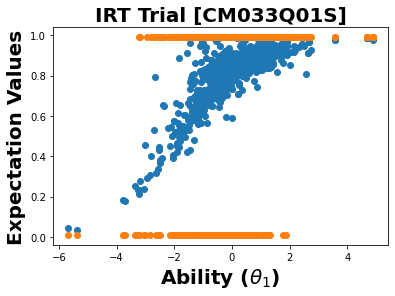

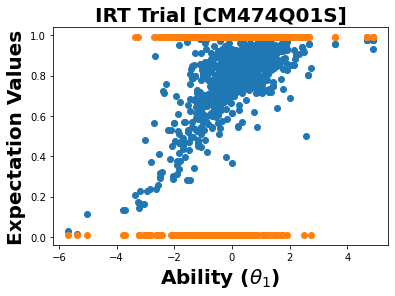

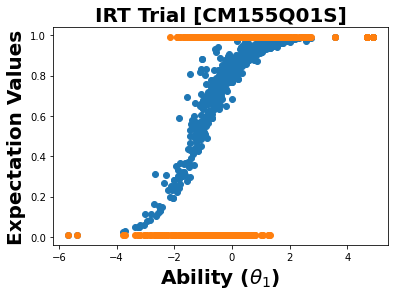

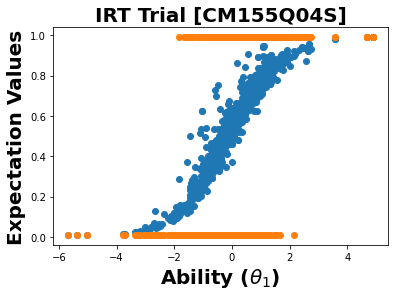

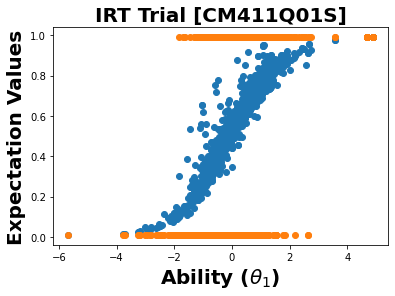

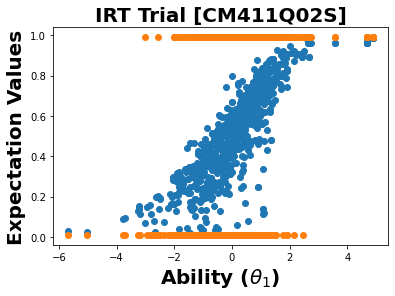

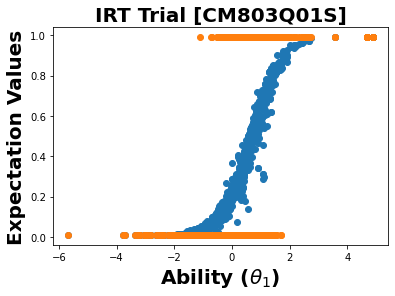

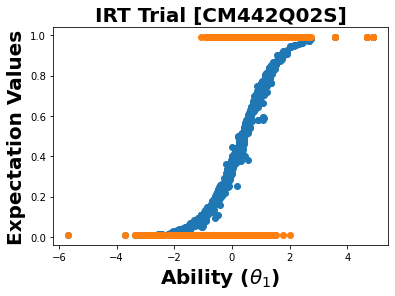

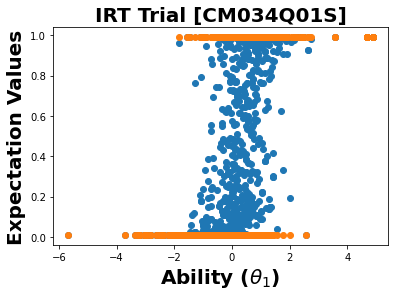

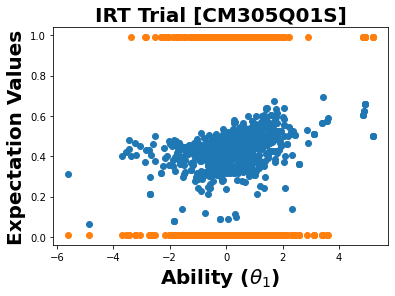

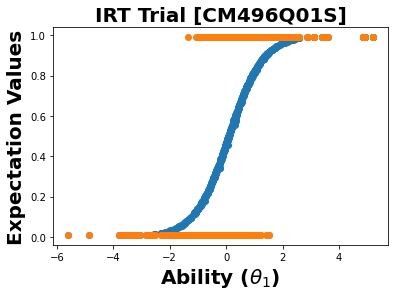

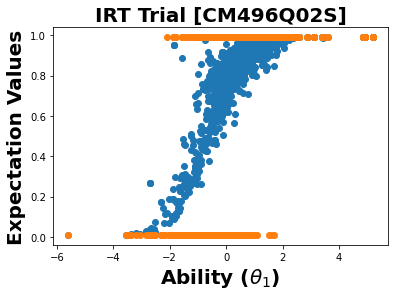

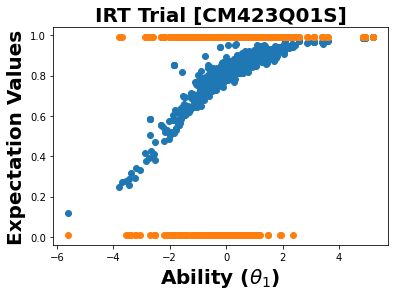

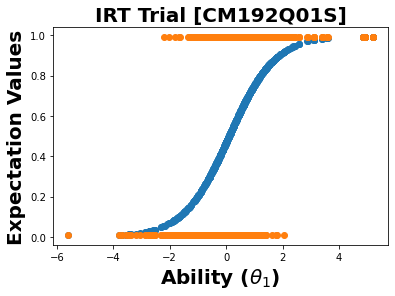

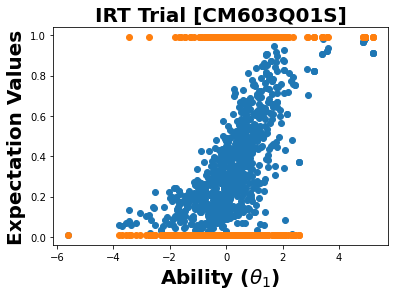

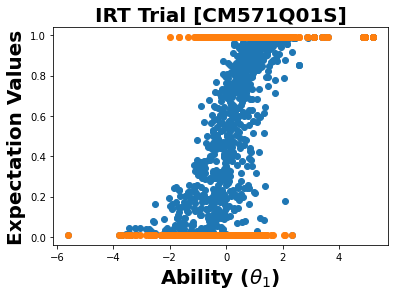

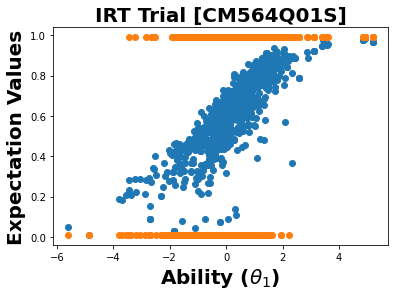

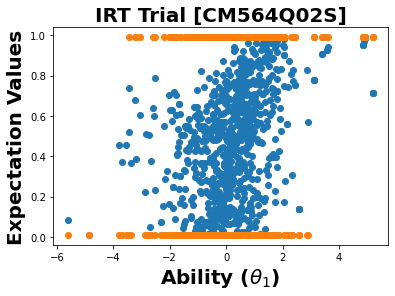

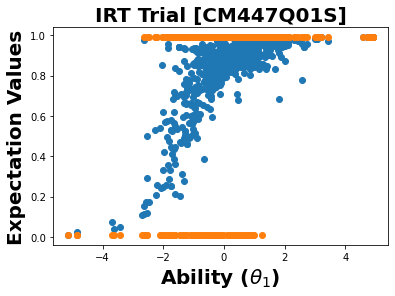

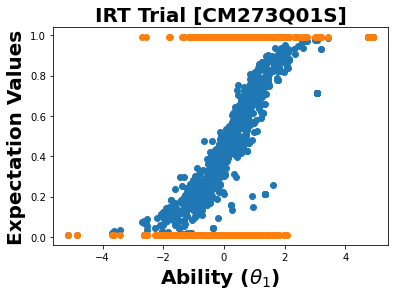

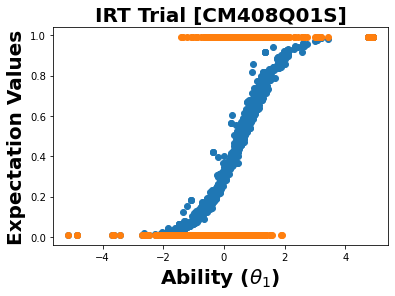

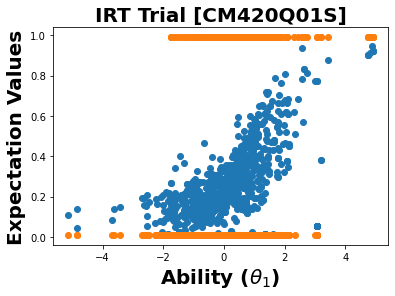

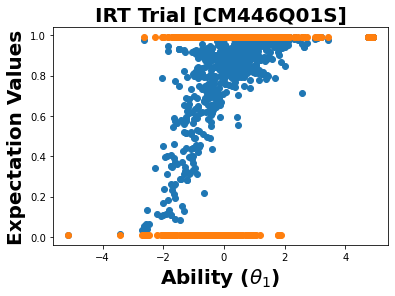

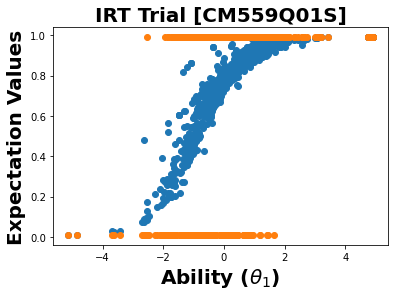

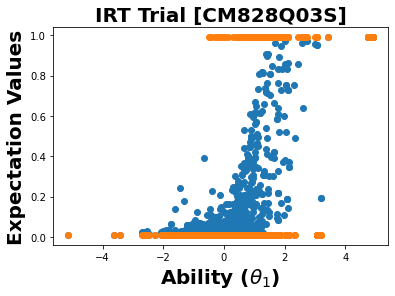

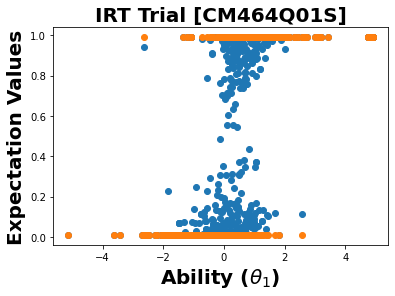

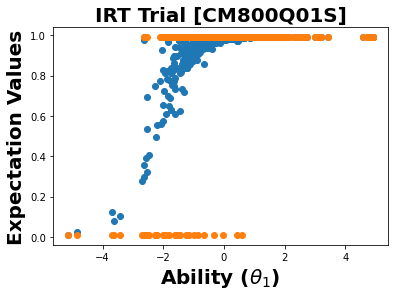

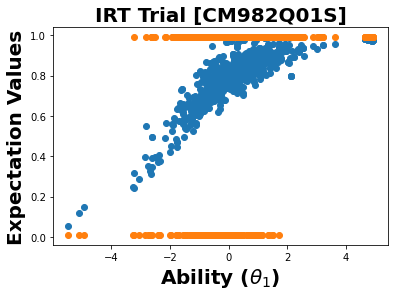

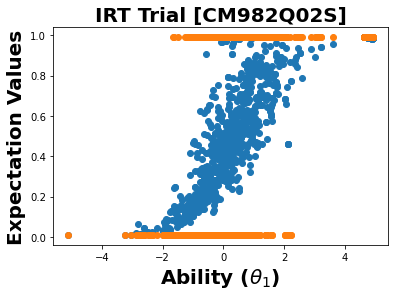

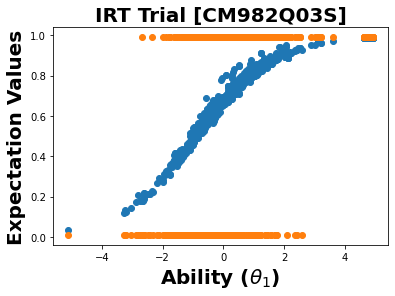

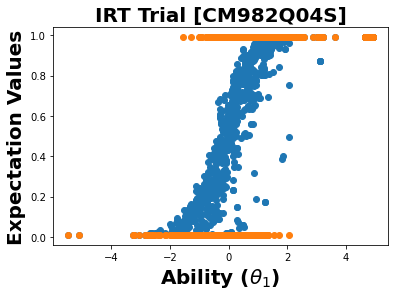

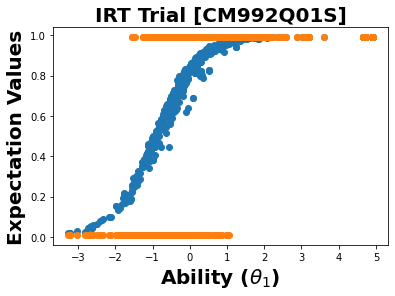

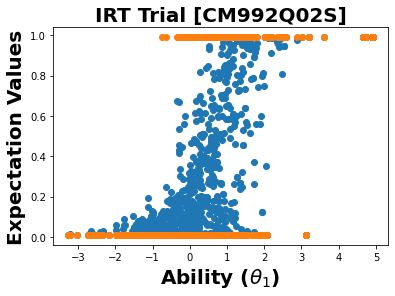

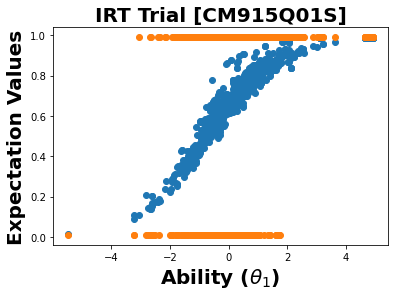

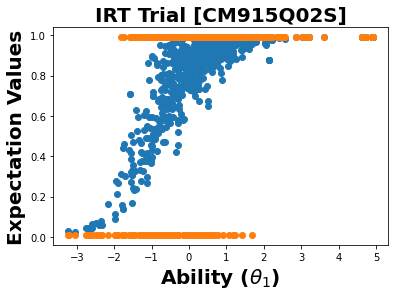

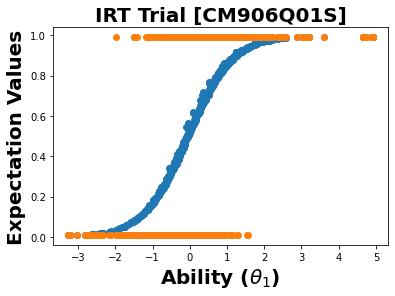

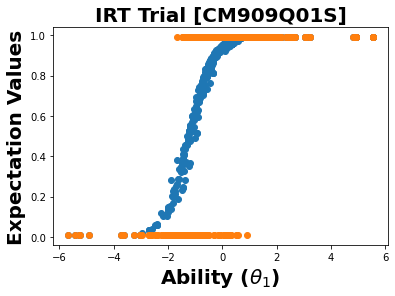

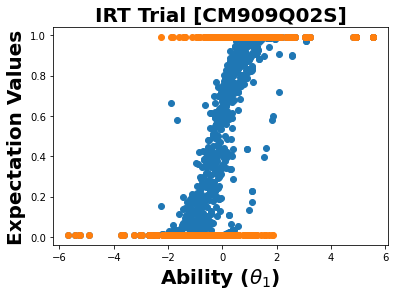

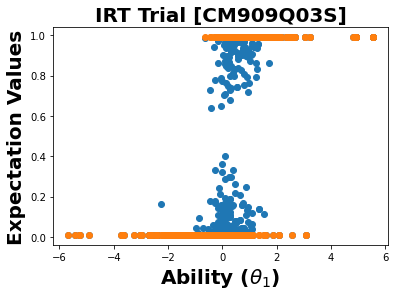

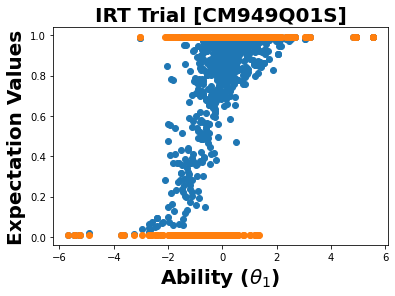

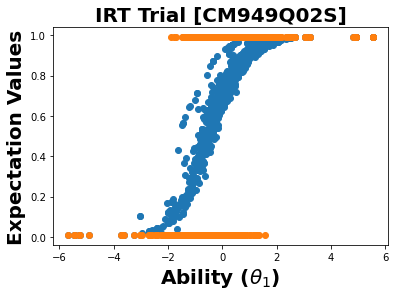

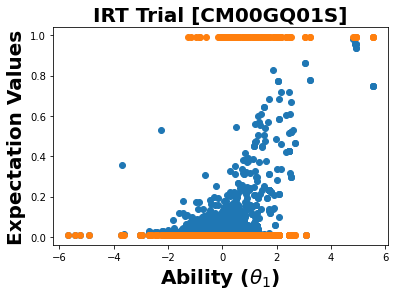

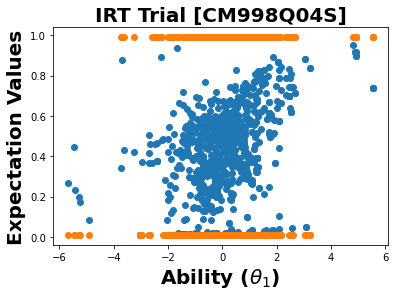

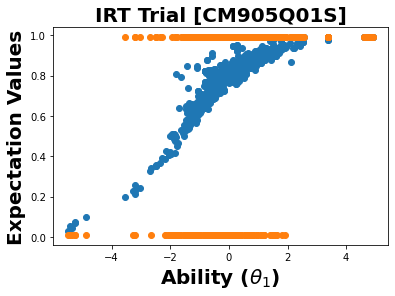

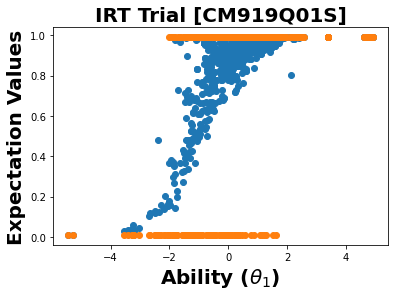

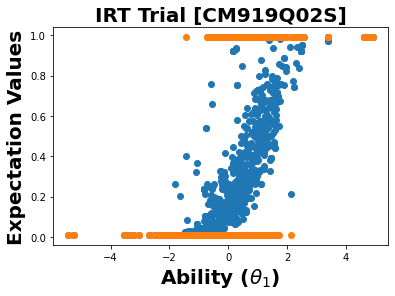

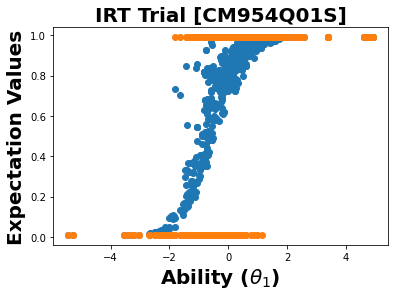

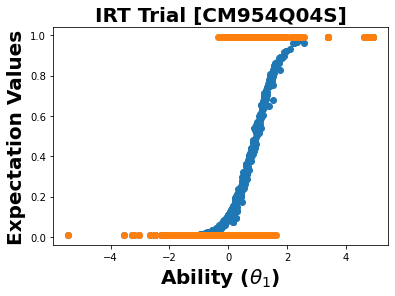

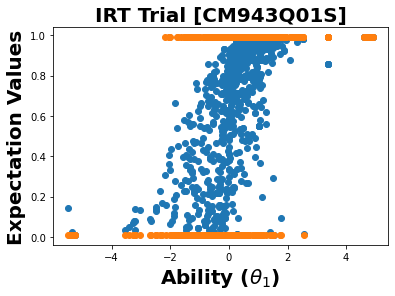

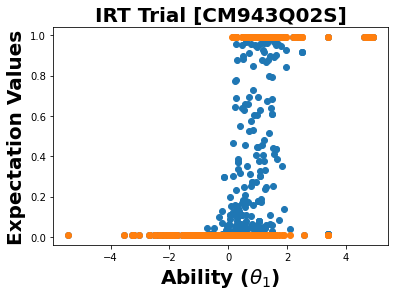

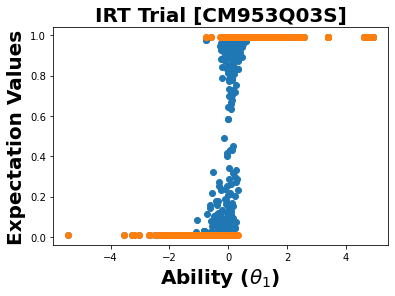

In [72]:
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)

    plt.title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()
            

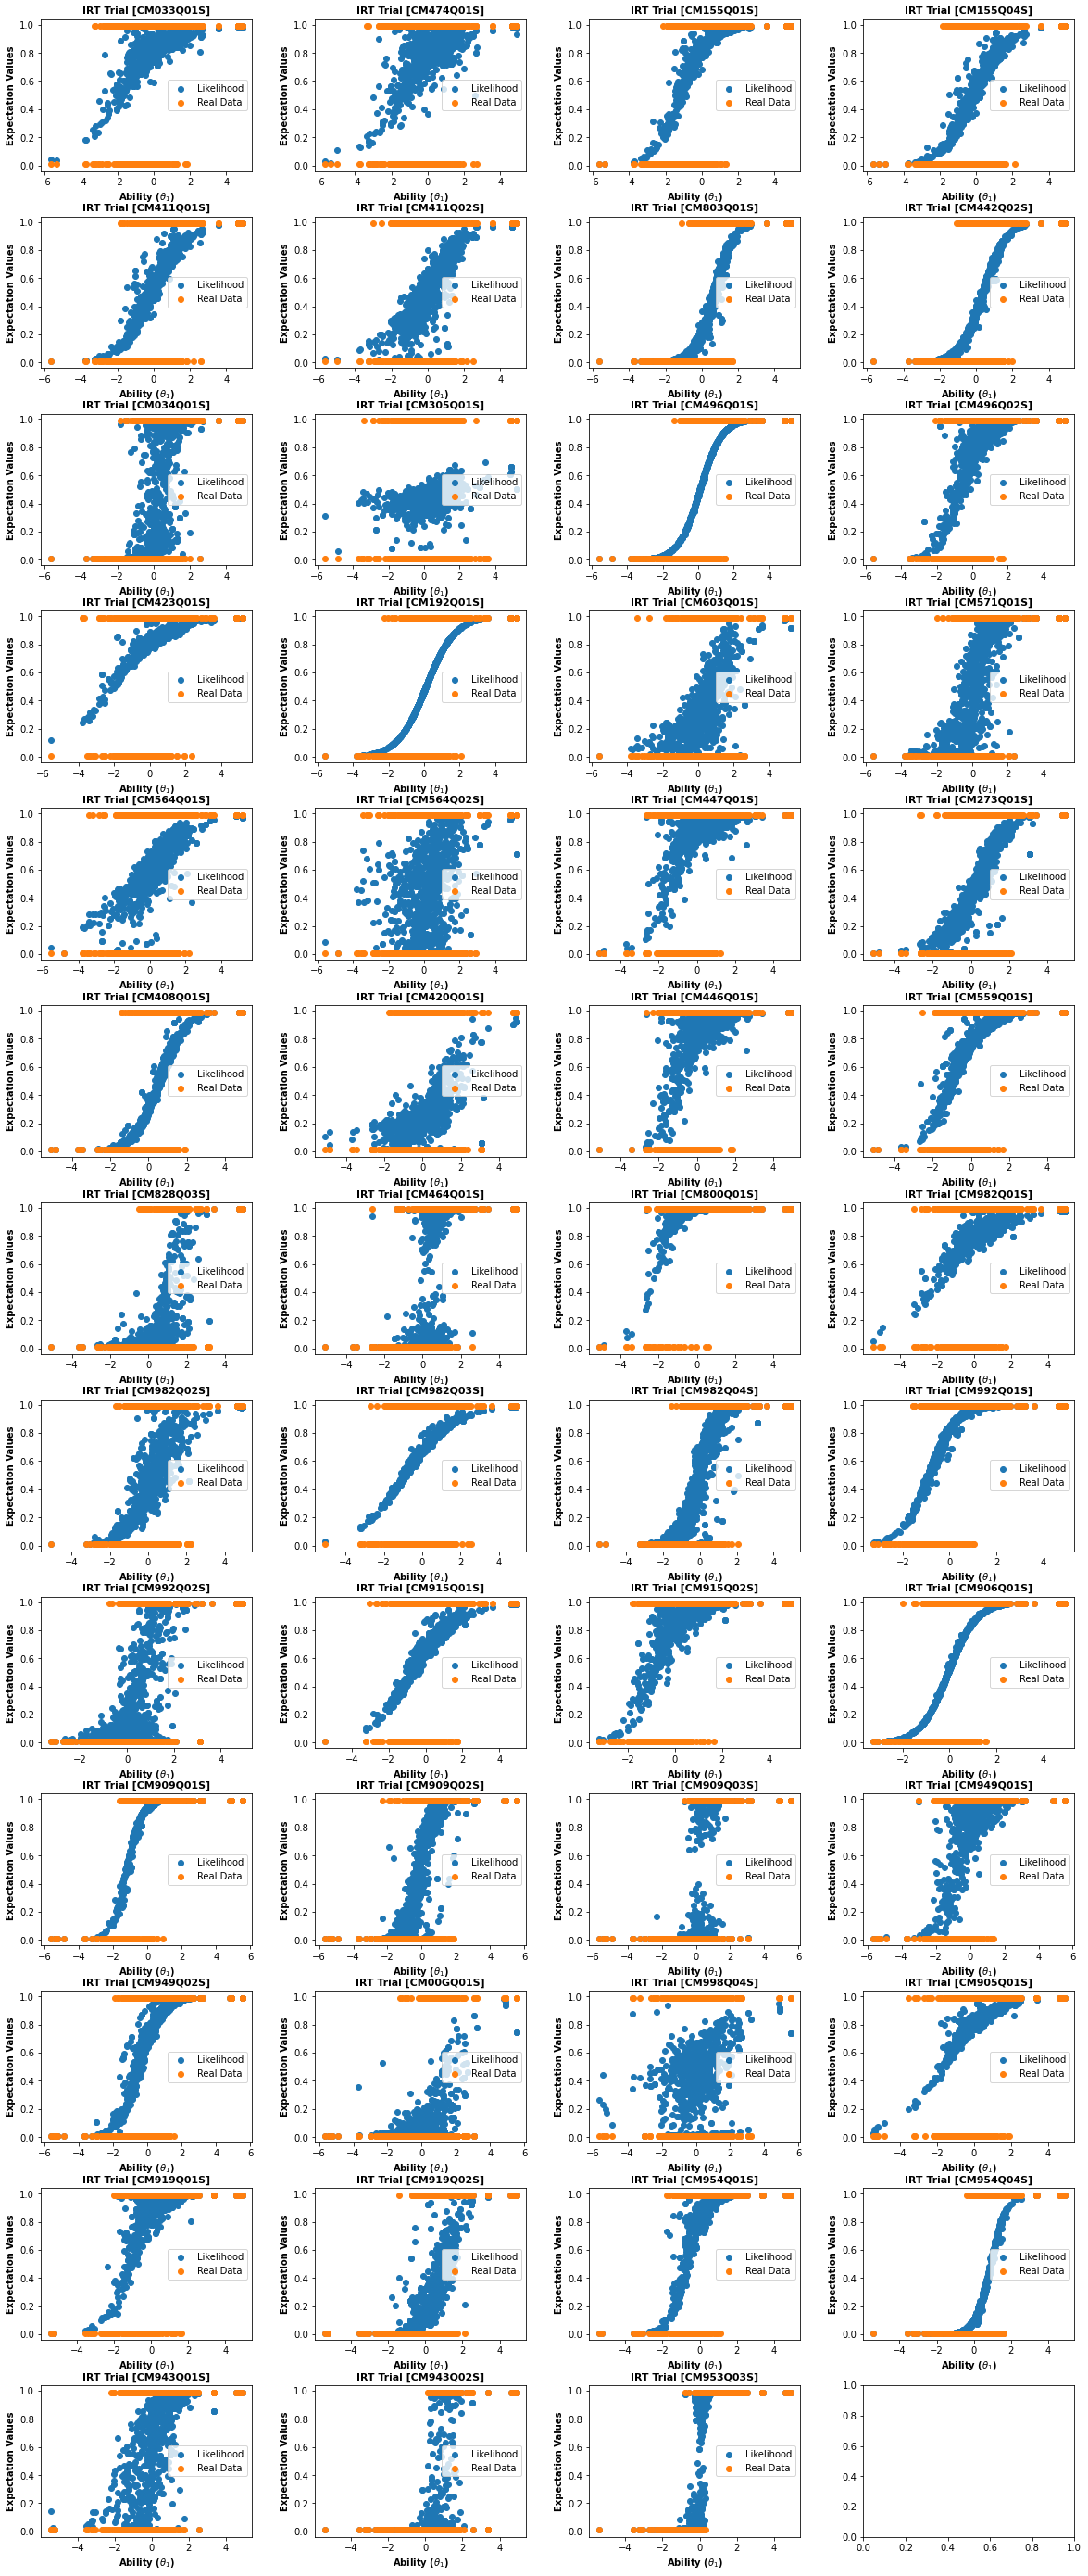

In [73]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## Plot in 'Equivalent Ability'

Equilvalent Ability is introduced to confirm the tendency of changing the model by the conversion formula below.

$\theta_{eq} = \theta_1 + \frac{\alpha_2}{\alpha_1} \theta_2$ 

In this formula, the compatibility($\theta_2$) plays the role to revise the initial bias of the ability($\theta_1$).

In [74]:
print(alpha1_test.shape)
print(theta2_test.shape)
print(alpha1_test[0, :])
print(alpha1_test[0, :][50])

(1, 51)
(2727, 1)
[ 0.71606346  0.69762952  1.29816426  1.12180283  1.11226172  0.74483036
  1.77171897  1.5457105   5.06960745  0.07406999  1.66158463  1.4886375
  0.63607604  1.24094517  0.67929378  1.53609829  0.59357439  0.30720707
  1.0855543   1.05754872  1.59657457  0.44154198  1.34742964  1.23136165
  1.12476851 15.14648798  1.55875341  0.61224643  1.19136129  0.79318338
  1.86324213  1.75691047  1.5522134   0.82084372  1.51626122  1.70059833
  2.35578487  2.54199622 12.97987736  1.37005278  1.52236243  0.88587263
  0.32589704  0.73833524  1.37792126  1.79357903  1.93539579  2.3861945
  1.49504744  4.02376974 17.1021905 ]
17.102190503098296


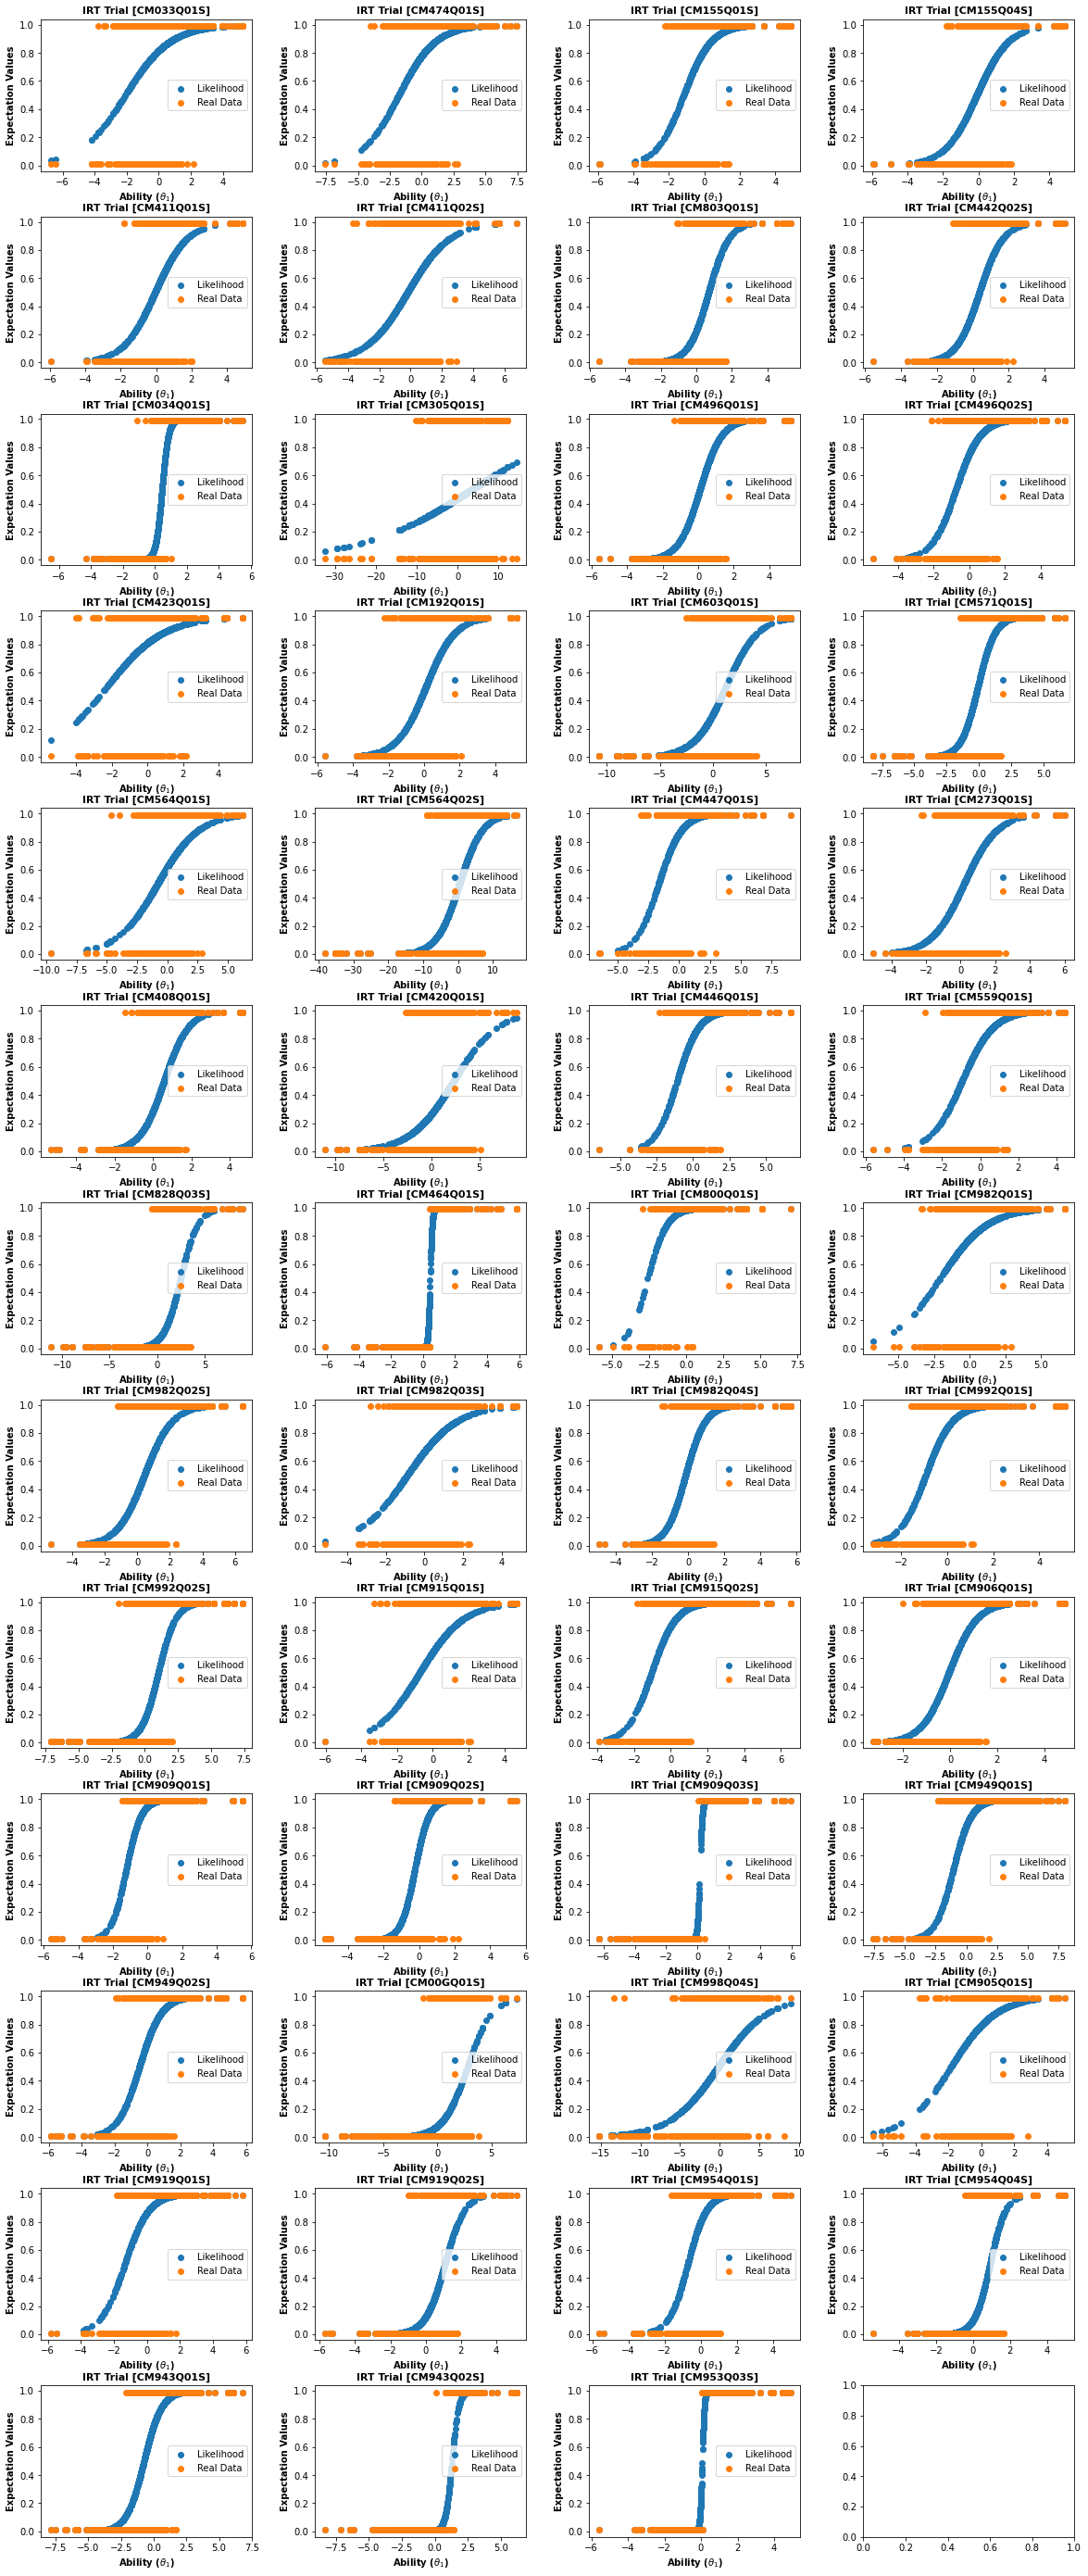

In [75]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

copy_th1 = vect_th1.copy()
copy_th2 = theta2_test[:, 0].copy()
copy_al1 = alpha1_test[0, :].copy()
copy_al2 = alpha2_test[0, :].copy()

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    th_eq = copy_th1 + ((copy_al2[i]) / (copy_al1[i])) * copy_th2
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            th_eq = np.delete(th_eq, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = th_eq.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## The Plot in 3D Again

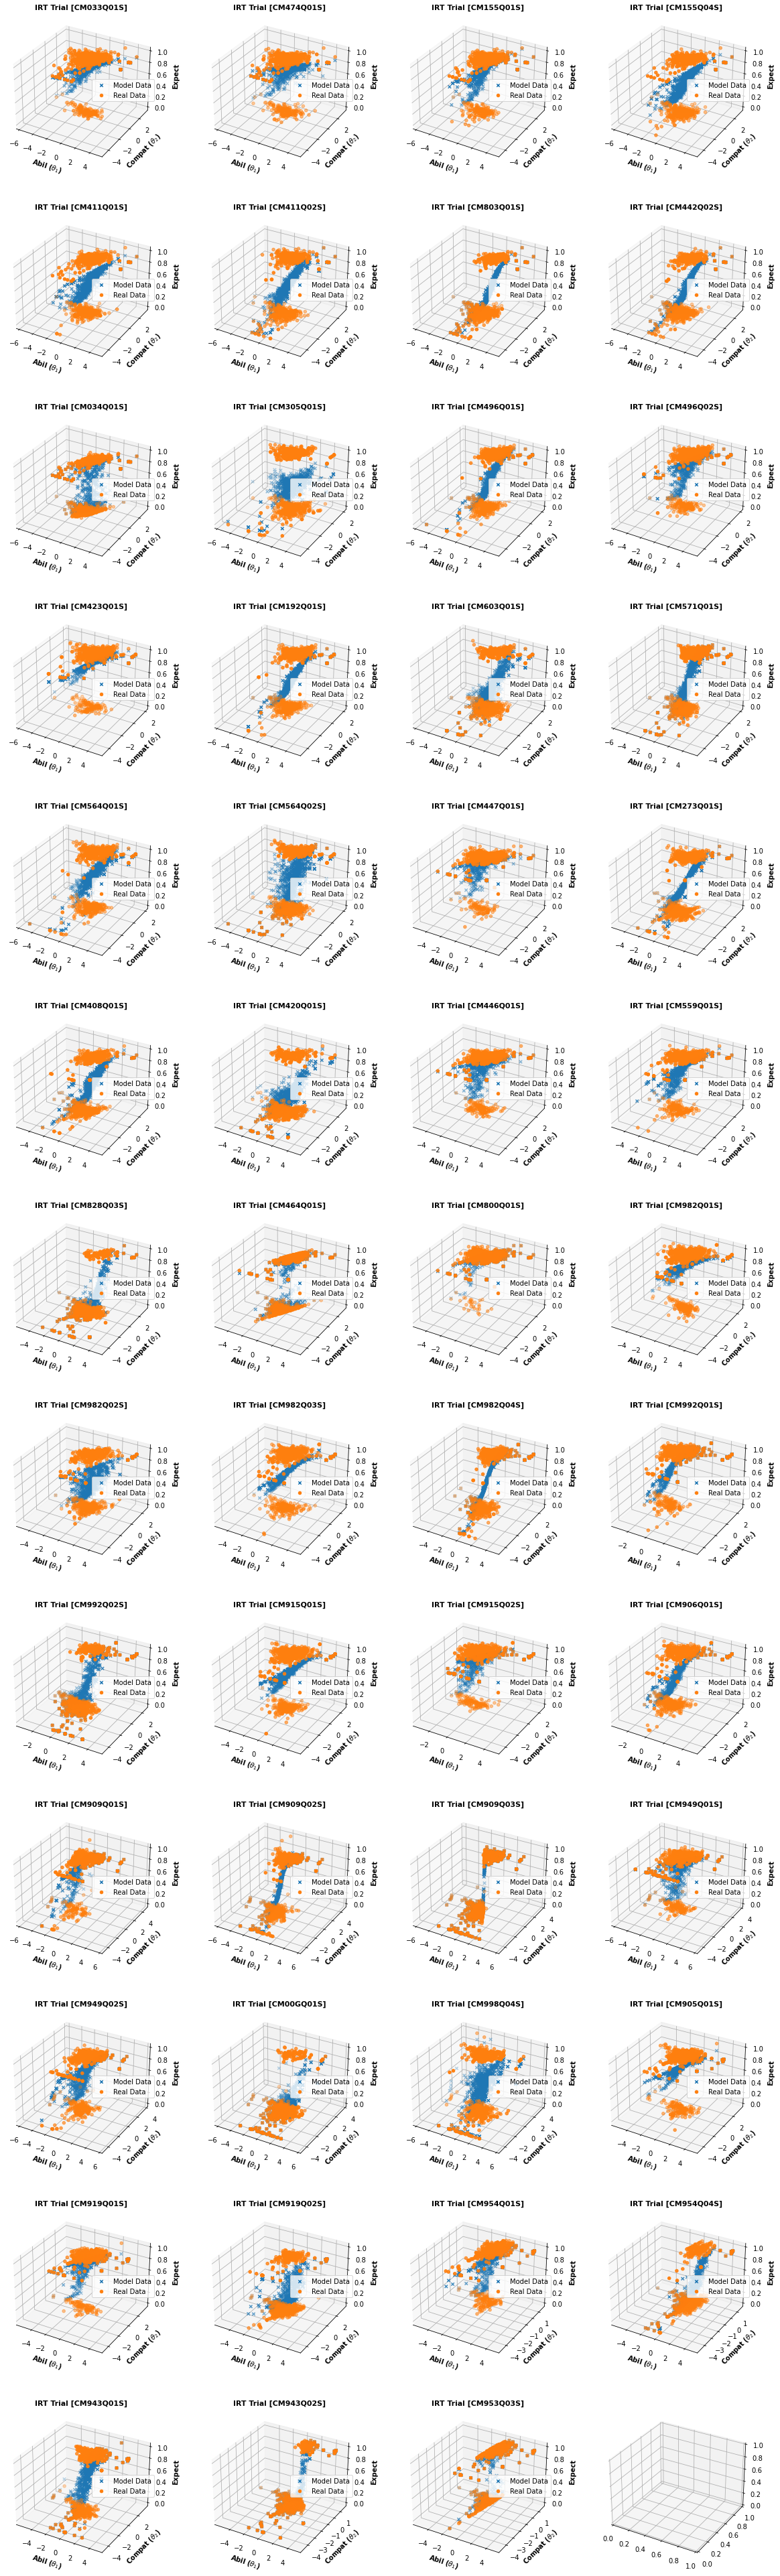

In [105]:
# 최종 plotting 결과를 격자 방식으로 나열
fig, axs = plt.subplots(nrows=13, ncols=4, figsize=(20, 70), 
                        subplot_kw={"projection":"3d"})

garo = 0
sero = 0

copy_th1 = vect_th1.copy()                       # Ability theta 복사
copy_th2 = theta2_test[:, 0].copy()              # Compatibility theta 복사

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)


# 격자 채워넣기

for i in range(seed_z.shape[1]):
    cat_th1 = copy_th1.copy()                     # 다음 문제에 활용하기 위해 리셋
    cat_th2 = copy_th2.copy()                     # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)       # 뒷쪽 리스트 성분부터 삭제 (index number 꼬이는거 방지)
        
        if np.isnan(seed_z[:, i][n]):             # seez_z에서 NaN 발견되는 순간, 여기에 해당하는 모든 theta 동시 삭제
            cat_th1 = np.delete(cat_th1, n)
            cat_th2 = np.delete(cat_th2, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = cat_th1.tolist()    # Ability theta가 x축
    ys = cat_th2.tolist()    # Compatibility theta가 y축
    z1 = copy_z.tolist()     # Model로 계산한 값
    z2 = copy_real.tolist()   # 정오표에 기록된 실제 데이터

    axs[garo, sero].scatter(xs=xs, ys=ys, zs=z1, marker='x', cmap='inferno', label='Model Data')
    axs[garo, sero].scatter(xs=xs, ys=ys, zs=z2, marker='o', cmap='Greens', label='Real Data')

    axs[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axs[garo, sero].set_xlabel('Abil ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axs[garo, sero].set_ylabel('Compat ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 10})
    axs[garo, sero].set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 10})
    
    axs[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4    # 오른쪽으로 한 칸씩 전진, 한 줄에 4개 모두 다 차면 줄 바꾸기 (숫자 범위: 0~3)
    sero = sero % 4      # 가로 4줄 모두 다 차면 Plot할 줄 바꾸기 (index 나누기 4의 몫에 해당)
    
plt.show()

## Comparison with existing theta

In [52]:
theta_ex = pd.read_csv("theta_LLH_T.csv")
print(theta_ex)

   Unnamed: 0         0        1         2         3         4         5  \
0           0  1.338115  0.78464  0.651824  0.189492  1.116489  0.013114   

          6         7         8  ...      2717      2718      2719      2720  \
0  2.214264 -1.300957  4.733336  ...  0.636779  1.282822  0.397753  0.442488   

       2721      2722      2723      2724      2725      2726  
0  0.500753  0.666618 -0.906567  1.266233 -1.178359  0.173322  

[1 rows x 2728 columns]


In [53]:
theta_pr1 = theta_ex.to_numpy()
theta_pr2 = theta_pr1[0, 1:]
print(theta_pr2)
print(theta_pr2.shape)

[ 1.33811548  0.78464012  0.65182431 ...  1.26623277 -1.17835892
  0.17332202]
(2727,)


In [54]:
# Now, it is time to compare two thetas in the end!!

import matplotlib.pylab as pylab
from sklearn.metrics import r2_score

In [55]:
theta_now = theta1_test.copy()
theta_nowT = np.transpose(theta_now)
theta_now_fin = theta_nowT[0, :]
print(theta_now_fin)
print(theta_now_fin.shape)

[ 1.34920729  0.67818431  0.50017306 ...  1.4258252  -0.82832196
  0.        ]
(2727,)


In [56]:
x = theta_pr2
y = theta_now_fin
R2 = r2_score(x, y)
print(R2)

0.9311841742523003


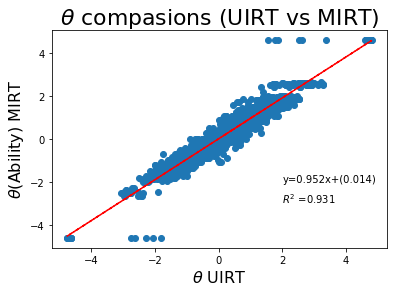

In [57]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' " UIRT", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' "(Ability) MIRT", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (UIRT vs MIRT)", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()

## Comparison with two thetas (Ability vs Compatibility)

In [58]:
theta_comp = theta2_test.copy()
theta_compT = np.transpose(theta_comp)
theta_comp_fin = theta_compT[0, :]
print(theta_comp_fin)
print(theta_comp_fin.shape)

[ 0.54684157  0.08089408  0.         ...  0.61820544  0.10593897
 -0.11426534]
(2727,)


In [59]:
x_2 = theta_now_fin               # Ability
y_2 = theta_comp_fin              # Compatibility
R2 = r2_score(x_2, y_2)
print(R2)

z_2 = np.polyfit(x_2, y_2, 1) # (X,Y,차원) 정의
p_2 = np.poly1d(z_2) # 1차원 다항식에 대한 연산을 캡슐화

0.13045406946421978


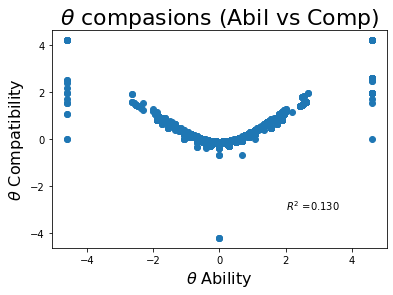

In [60]:
pylab.plot(x_2, y_2,'o')
pylab.xlabel(r'$\theta$' " Ability", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " Compatibility", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (Abil vs Comp)", fontdict={'size': 22})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()